In [9]:
import matplotlib as plt
import numpy as np
import pandas as pd

In [10]:
#read csv file
dt= pd.read_csv("C:/Jupyter/IPL2024_Data.csv")

In [11]:
dt

Year             Player_Name  Matches_Batted  Not_Outs  Runs_Scored  \
0     2024         Ruturaj Gaikwad               2         0           61   
1     2023         Ruturaj Gaikwad              16         1          590   
2     2022         Ruturaj Gaikwad              14         0          368   
3     2021         Ruturaj Gaikwad              16         2          635   
4     2020         Ruturaj Gaikwad               6         2          204   
...    ...                     ...             ...       ...          ...   
1167  2022         Mayank Markande               2         0            0   
1168  2021         Mayank Markande               1         0            0   
1169  2019         Mayank Markande               3         1            6   
1170  2018         Mayank Markande              14         4           21   
1171     0  Jhathavedh Subramanyan               0         0            0   

     Highest_Score  Batting_Average  Balls_Faced  Batting_Strike_Rate  \
0               46            30.50           51               119.61   
1               92            42.14          400               147.50   
2               99            26.29          291               126.46   
3             101*            45.35          466               136.26   
4               72            51.00          169               120.71   
...            ...              ...          ...                  ...   
1167             0             0.00            0                 0.00   
1168             0             0.00            0                 0.00   
1169             6             6.00            5               120.00   
1170            7*            10.50           24                87.50   
1171             0             0.00            0                 0.00   

      Centuries  ...  Matches_Bowled  Balls_Bowled  Runs_Conceded  \
0             0  ...               2             0              0   
1             0  ...              16             0              0   
2             0  ...              14             0              0   
3             1  ...              16             0              0   
4             0  ...               6             0              0   
...         ...  ...             ...           ...            ...   
1167          0  ...               2            42             57   
1168          0  ...               1            18             26   
1169          0  ...               3            36             59   
1170          0  ...              14           264            368   
1171          0  ...               0             0              0   

      Wickets_Taken  Best_Bowling_Match  Bowling_Average  Economy_Rate  \
0                 0                   0             0.00          0.00   
1                 0                   0             0.00          0.00   
2                 0                   0             0.00          0.00   
3                 0                   0             0.00          0.00   
4                 0                   0             0.00          0.00   
...             ...                 ...              ...           ...   
1167              1              Jan-26            57.00          8.14   
1168              0                0/26             0.00          8.66   
1169              1              Jan-23            59.00          9.83   
1170             15              Apr-23            24.53          8.36   
1171              0                   0             0.00          0.00   

      Bowling_Strike_Rate  Four_Wicket_Hauls Five_Wicket_Hauls  
0                     0.0                  0                 0  
1                     0.0                  0                 0  
2                     0.0                  0                 0  
3                     0.0                  0                 0  
4                     0.0                  0                 0  
...                   ...                ...               ...  
1167                 42.0      

In [12]:
dt['Year'] = pd.to_numeric(dt['Year'], errors='coerce')
dt = dt.dropna(subset=['Year'])
dt = dt[dt['Year'] > 2000]  # Keep only valid IPL years

In [13]:
#check for null value
nullCheck="Null values per collumn",dt.isnull().sum()
nullCheck

('Null values per collumn',
 Year                   0
 Player_Name            0
 Matches_Batted         0
 Not_Outs               0
 Runs_Scored            0
 Highest_Score          0
 Batting_Average        0
 Balls_Faced            0
 Batting_Strike_Rate    0
 Centuries              0
 Half_Centuries         0
 Fours                  0
 Sixes                  0
 Catches_Taken          0
 Stumpings              0
 Matches_Bowled         0
 Balls_Bowled           0
 Runs_Conceded          0
 Wickets_Taken          0
 Best_Bowling_Match     0
 Bowling_Average        0
 Economy_Rate           0
 Bowling_Strike_Rate    0
 Four_Wicket_Hauls      0
 Five_Wicket_Hauls      0
 dtype: int64)

In [14]:
#Number of rows and column
print(f"Rows: {dt.shape[0]}, Columns: {dt.shape[1]}")

Rows: 1130, Columns: 25


In [15]:
#Data types of each column
dataType="The data type of each column is", dt.dtypes
dataType

('The data type of each column is',
 Year                     int64
 Player_Name             object
 Matches_Batted           int64
 Not_Outs                 int64
 Runs_Scored              int64
 Highest_Score           object
 Batting_Average        float64
 Balls_Faced              int64
 Batting_Strike_Rate    float64
 Centuries                int64
 Half_Centuries           int64
 Fours                    int64
 Sixes                    int64
 Catches_Taken            int64
 Stumpings                int64
 Matches_Bowled           int64
 Balls_Bowled             int64
 Runs_Conceded            int64
 Wickets_Taken            int64
 Best_Bowling_Match      object
 Bowling_Average        float64
 Economy_Rate           float64
 Bowling_Strike_Rate    float64
 Four_Wicket_Hauls        int64
 Five_Wicket_Hauls        int64
 dtype: object)

In [16]:
# Creating a seperate data frame
performance_dt = dt[['Player_Name', 'Runs_Scored', 'Catches_Taken', 'Wickets_Taken']]
performance_dt

Player_Name  Runs_Scored  Catches_Taken  Wickets_Taken
0     Ruturaj Gaikwad           61              0              0
1     Ruturaj Gaikwad          590             17              0
2     Ruturaj Gaikwad          368              4              0
3     Ruturaj Gaikwad          635              6              0
4     Ruturaj Gaikwad          204              4              0
...               ...          ...            ...            ...
1166  Mayank Markande           21              1             12
1167  Mayank Markande            0              2              1
1168  Mayank Markande            0              0              0
1169  Mayank Markande            6              0              1
1170  Mayank Markande           21              3             15

[1130 rows x 4 columns]

In [17]:
# Save to a new CSV
performance_dt.to_csv('Player_Performance.csv', index=False)

In [18]:
# Find players with maximum runs
max_runs = performance_dt.loc[performance_dt['Runs_Scored'].idxmax()]
print("Player with maximum runs:\n", max_runs)

Player with maximum runs:
 Player_Name      Virat Kohli
Runs_Scored              973
Catches_Taken              6
Wickets_Taken              0
Name: 946, dtype: object


In [19]:
# Find players with maximum catches
max_catches = performance_dt.loc[performance_dt['Catches_Taken'].idxmax()]
print("Player with maximum catches:\n", max_catches)

Player with maximum catches:
 Player_Name      Rishabh Pant
Runs_Scored               488
Catches_Taken              18
Wickets_Taken               0
Name: 120, dtype: object


In [20]:
# Find players with maximum wickets
max_wickets = performance_dt.loc[performance_dt['Wickets_Taken'].idxmax()]
print("Player with maximum wickets:\n", max_wickets)

Player with maximum wickets:
 Player_Name      Harshal Patel
Runs_Scored                 59
Catches_Taken                3
Wickets_Taken               32
Name: 793, dtype: object


In [21]:
# Define roll number and get player range
roll_no = 20
start_index = roll_no * 1 - 1
end_index = roll_no * 1


specific_player = performance_dt.iloc[start_index:end_index]
player_name = specific_player.iloc[0]['Player_Name']

player_records = dt[dt['Player_Name'] == player_name]

print(f"Data for {player_name}:")
print(player_records)

Data for MS Dhoni:
    Year Player_Name  Matches_Batted  Not_Outs  Runs_Scored Highest_Score  \
7   2024    MS Dhoni               2         0            0             0   
8   2023    MS Dhoni              16         8          104           32*   
9   2022    MS Dhoni              14         6          232           50*   
10  2021    MS Dhoni              16         4          114           18*   
11  2020    MS Dhoni              14         4          200           47*   
12  2019    MS Dhoni              15         7          416           84*   
13  2018    MS Dhoni              16         9          455           79*   
14  2017    MS Dhoni              16         4          290           61*   
15  2016    MS Dhoni              14         5          284           64*   
16  2015    MS Dhoni              17         5          372            53   
17  2014    MS Dhoni              16        10          371           57*   
18  2013    MS Dhoni              18         5          4

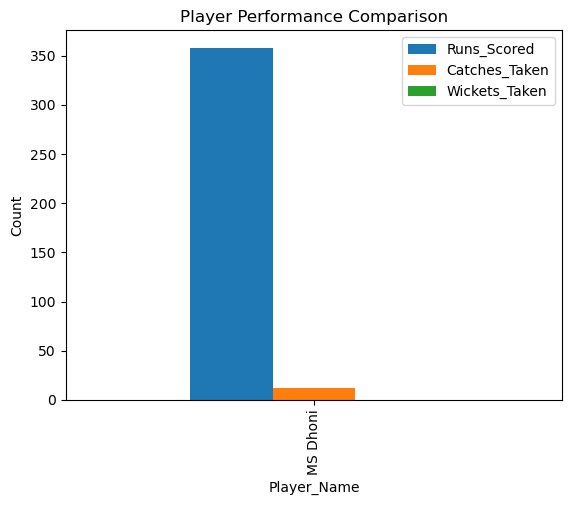

In [22]:
#show player data graph
import matplotlib.pyplot as plt
player_comparison = performance_dt.iloc[start_index:end_index]
player_comparison.plot(x='Player_Name', y=['Runs_Scored', 'Catches_Taken', 'Wickets_Taken'], kind='bar')
plt.title('Player Performance Comparison')
plt.ylabel('Count')
plt.savefig('playerPerformance')
plt.show()

In [23]:
#As we can see from the above graph about Dhoni, his ability to score runs overshadowed all his other skills. With over 350 runs, he outshined his 
#moderate number of catches and minimal involvement in taking wickets. Though his primary role wasn’t bowling, his exceptional batting always carried 
#the team to victory.

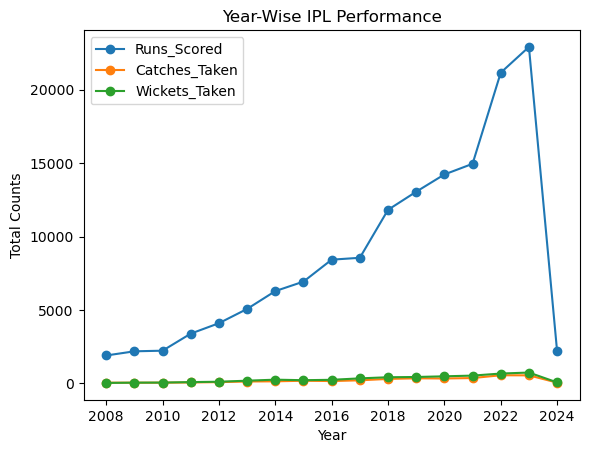

In [24]:
# Group data by Year and aggregate metrics
yearly_stats = dt.groupby('Year').agg({
    'Runs_Scored': 'sum',
    'Catches_Taken': 'sum',
    'Wickets_Taken': 'sum'
}).reset_index()

# Plot year-wise trends
yearly_stats.plot(x='Year', y=['Runs_Scored', 'Catches_Taken', 'Wickets_Taken'], kind='line', marker='o')
plt.title('Year-Wise IPL Performance')
plt.ylabel('Total Counts')
plt.savefig('yearIPL')
plt.show()

In [46]:
#This graph tells a story of IPL performance over the years from 2008 to 2024. Runs scored steadily climbed until peaking in 2023 but sharply dropped 
#in 2024, hinting at a dramatic shift—maybe fewer matches or a lack of key players. Catches and wickets stayed consistent, reflecting steady fielding and 
#bowling efforts. It's like a tale of dominance in batting, disrupted in the end!

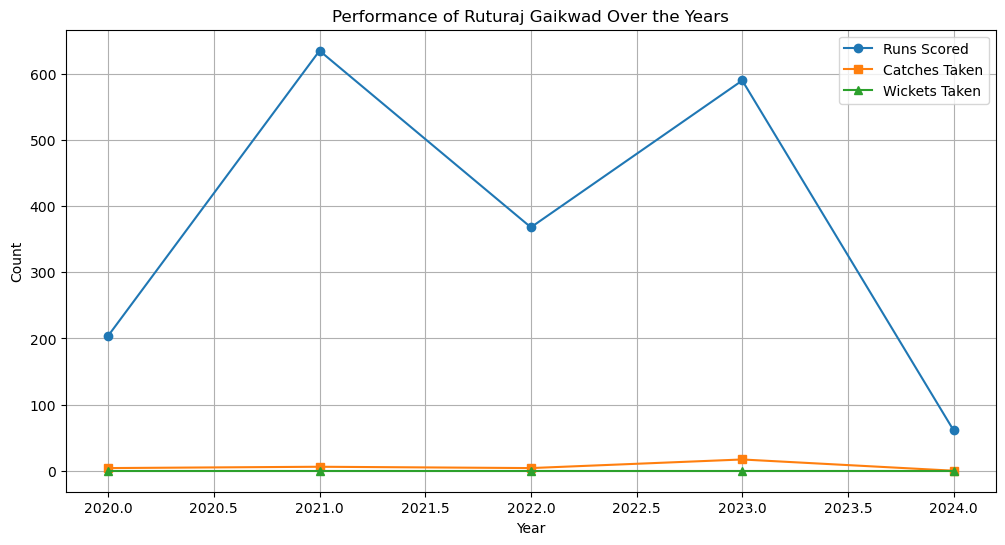

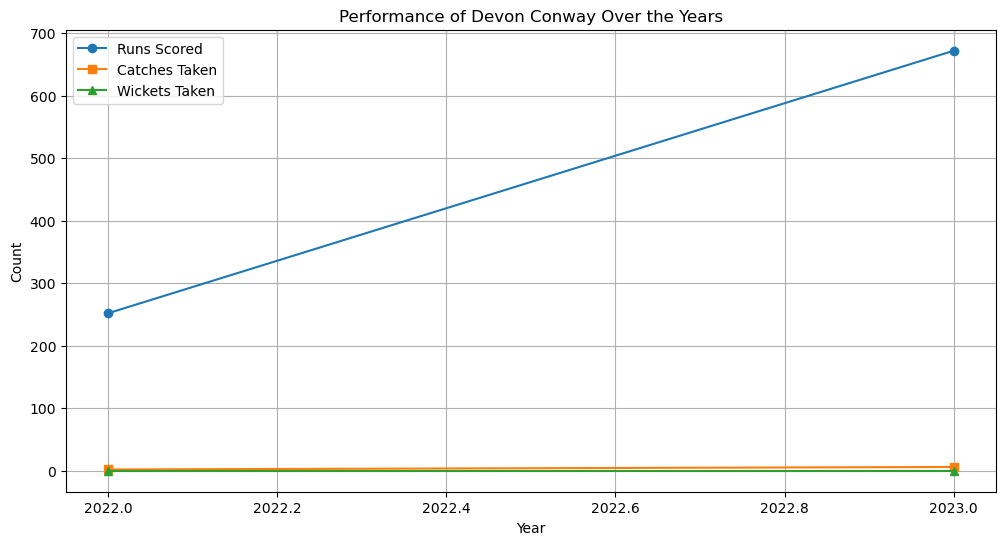

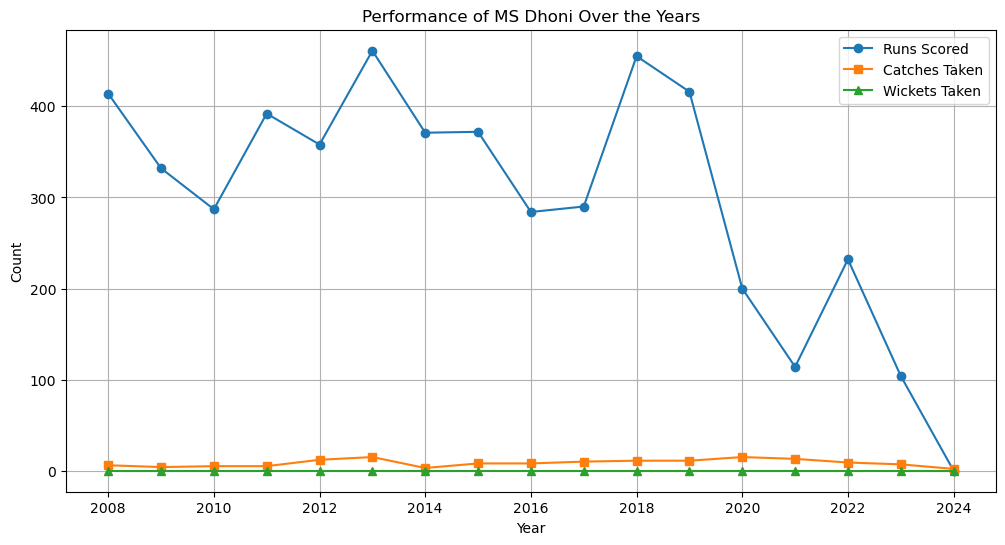

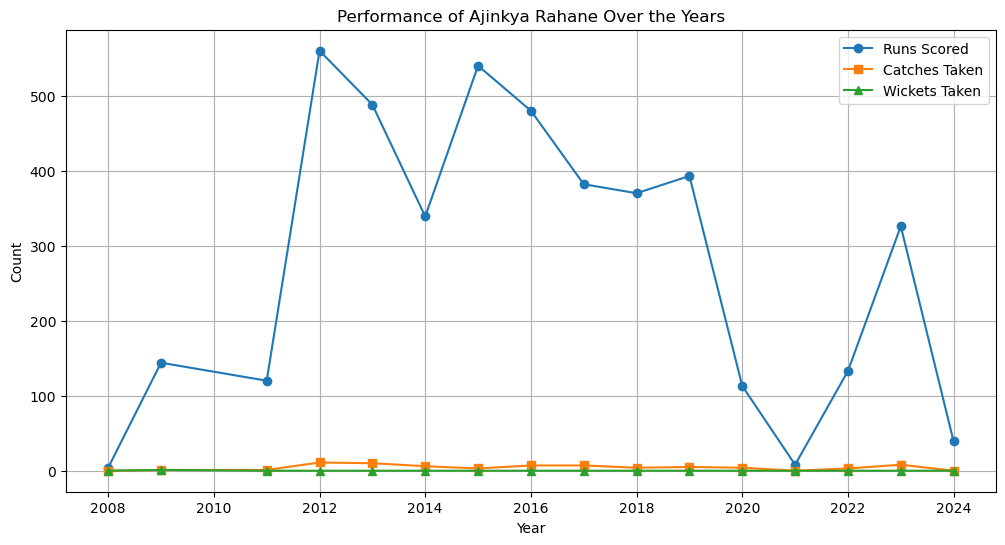

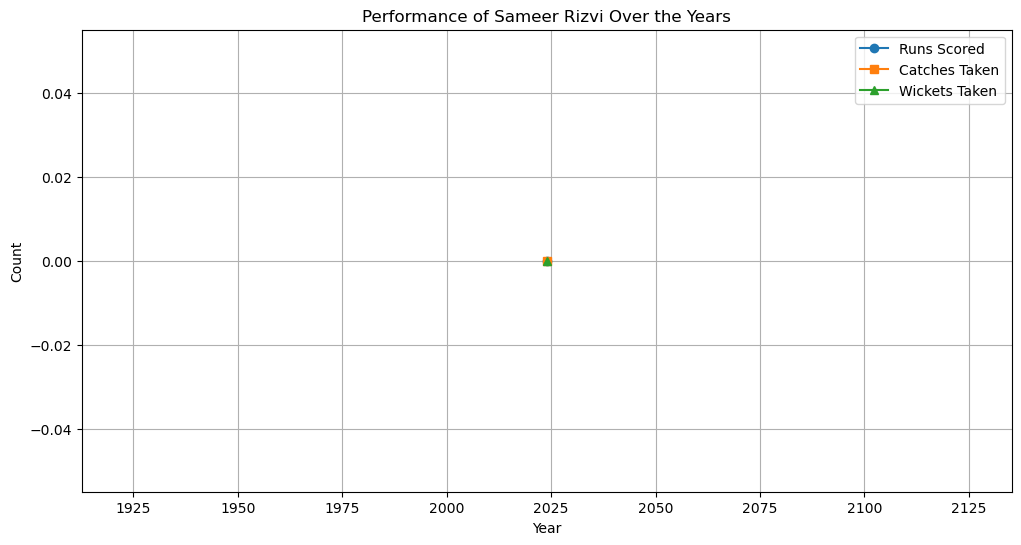

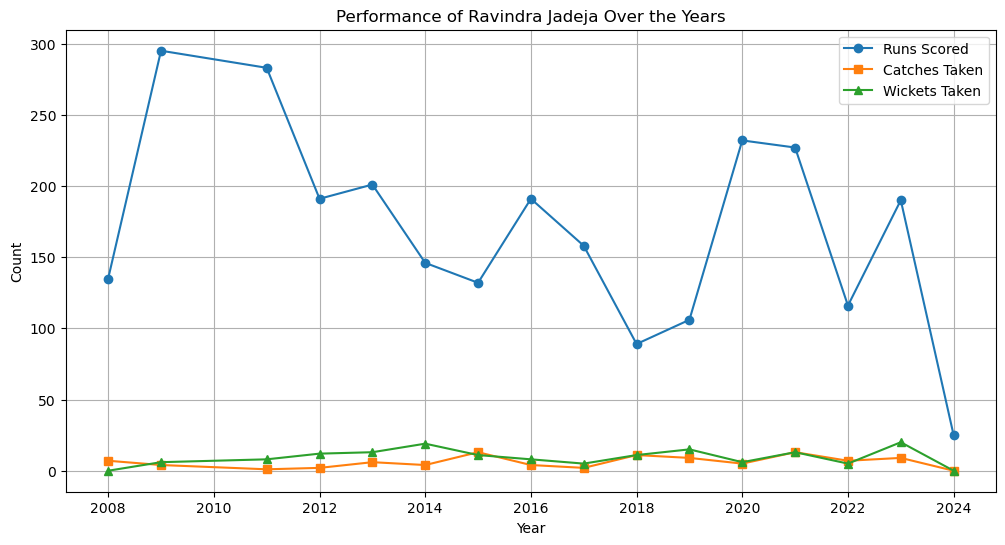

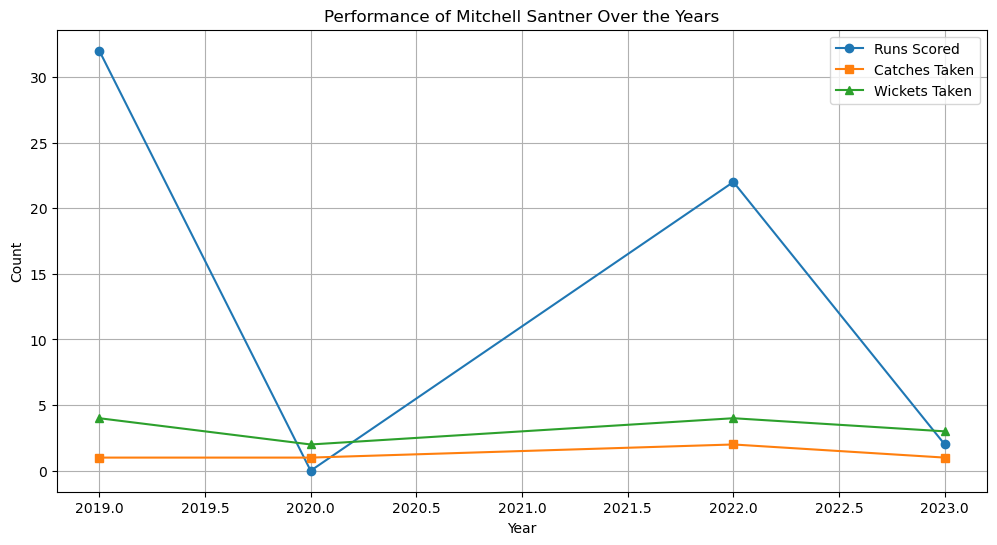

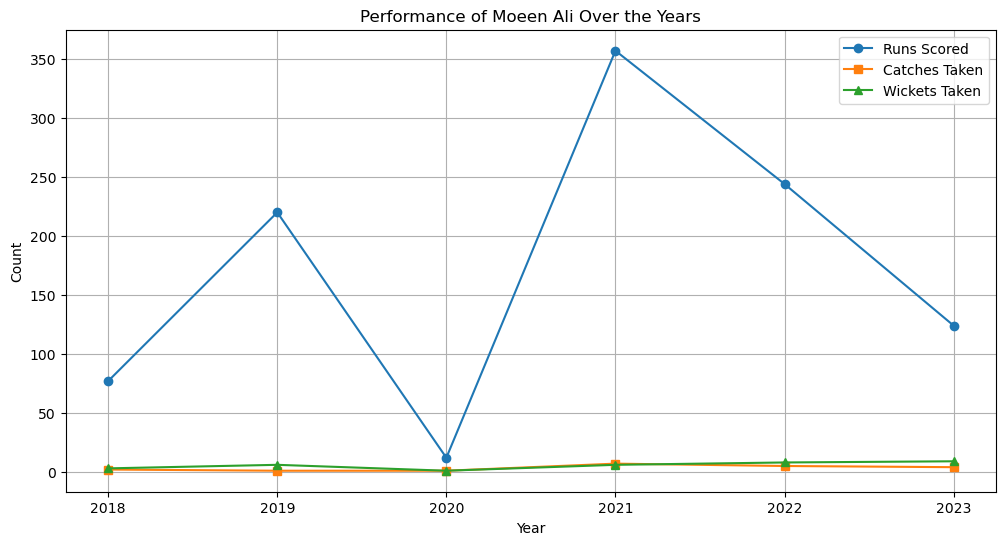

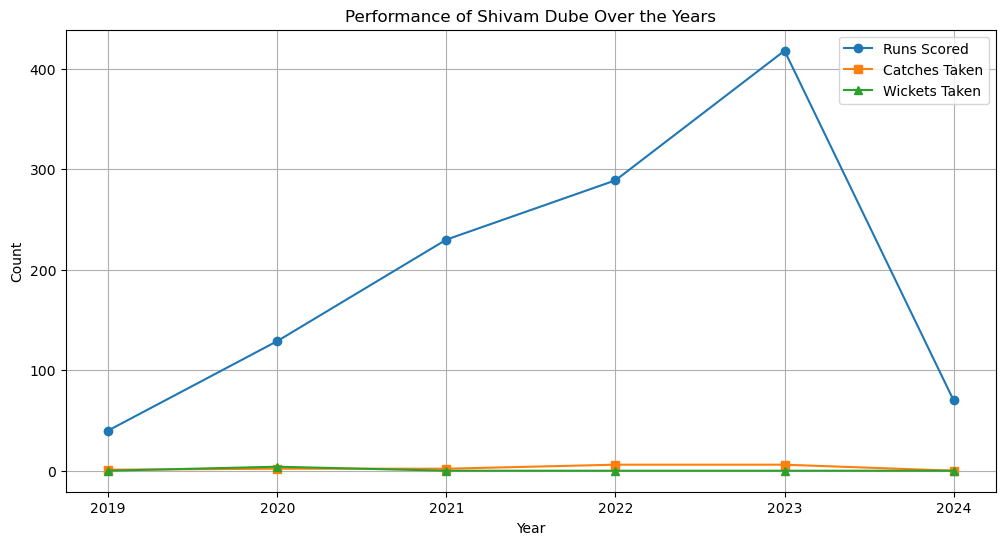

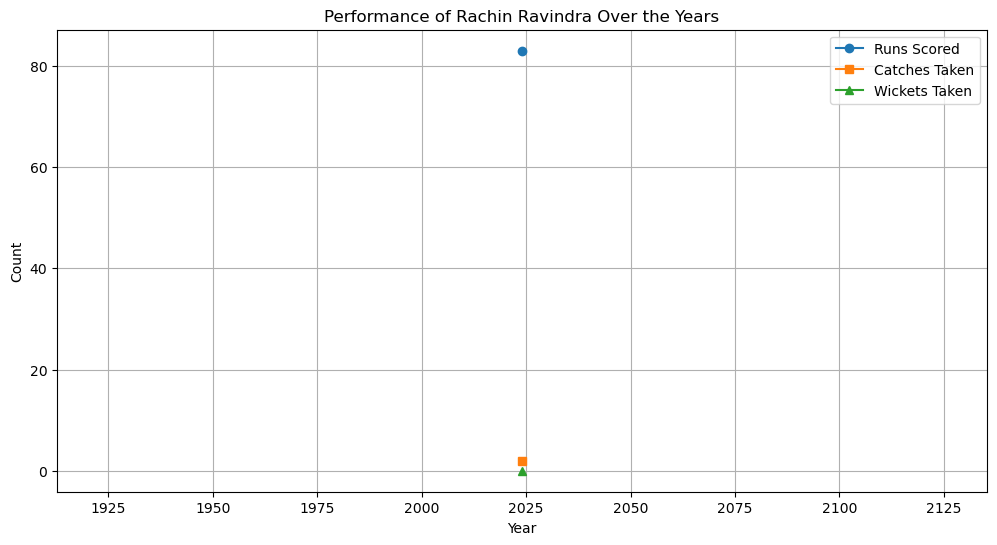

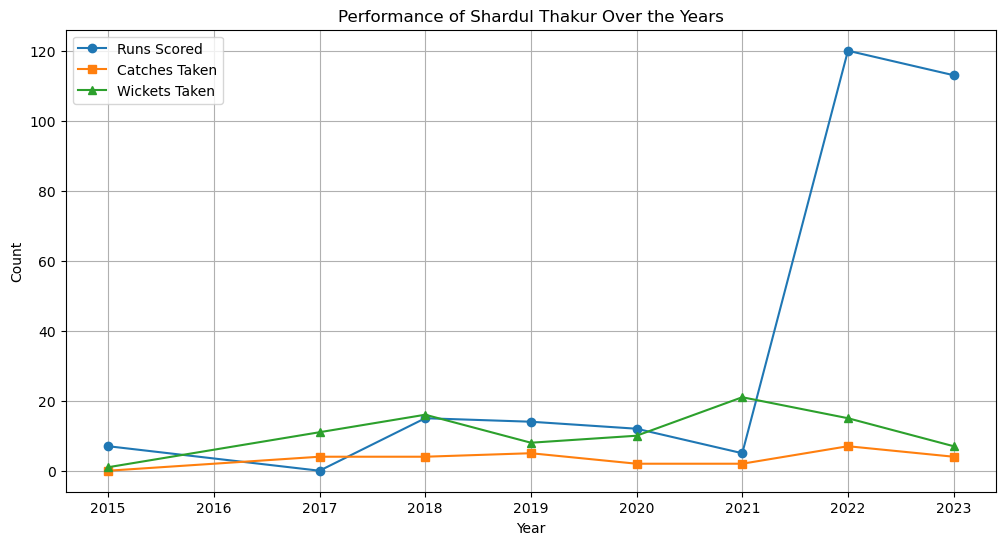

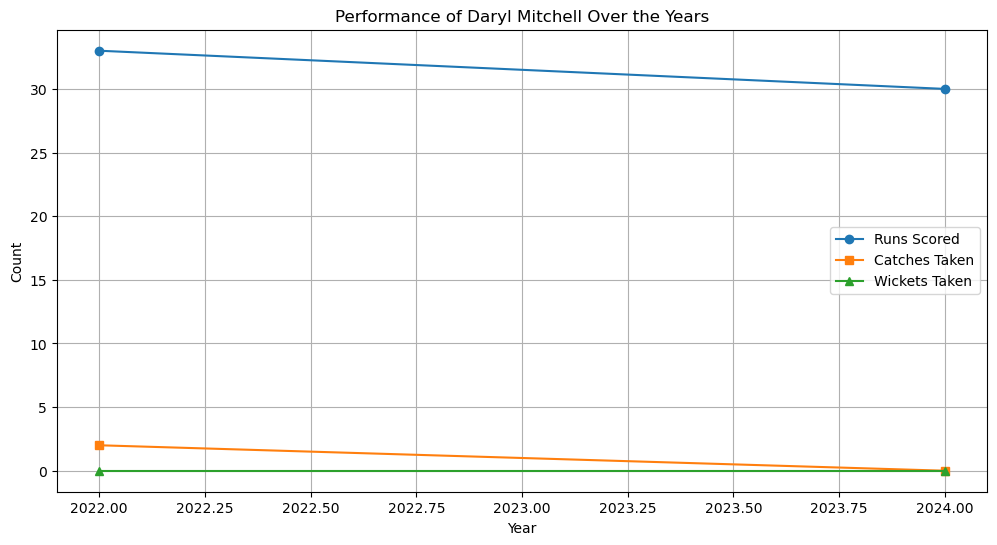

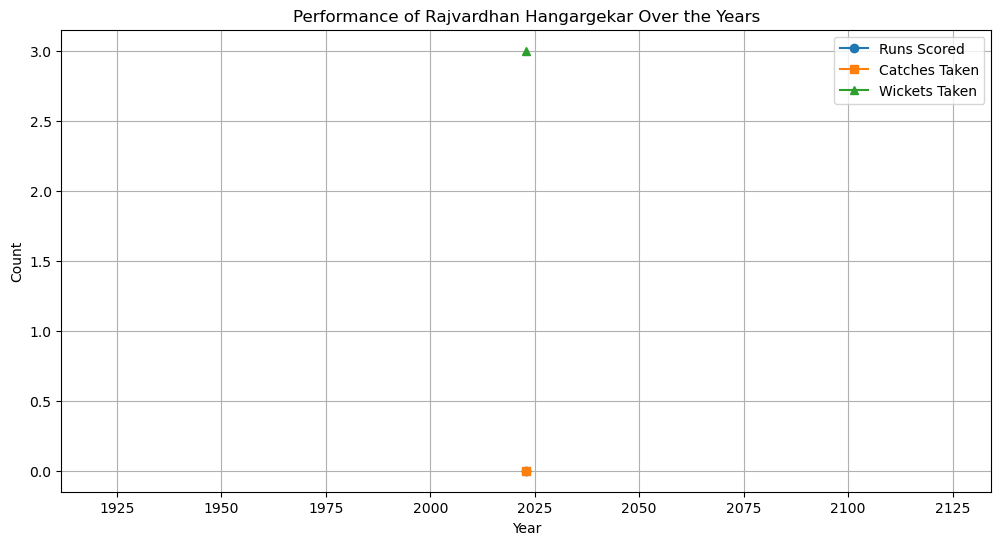

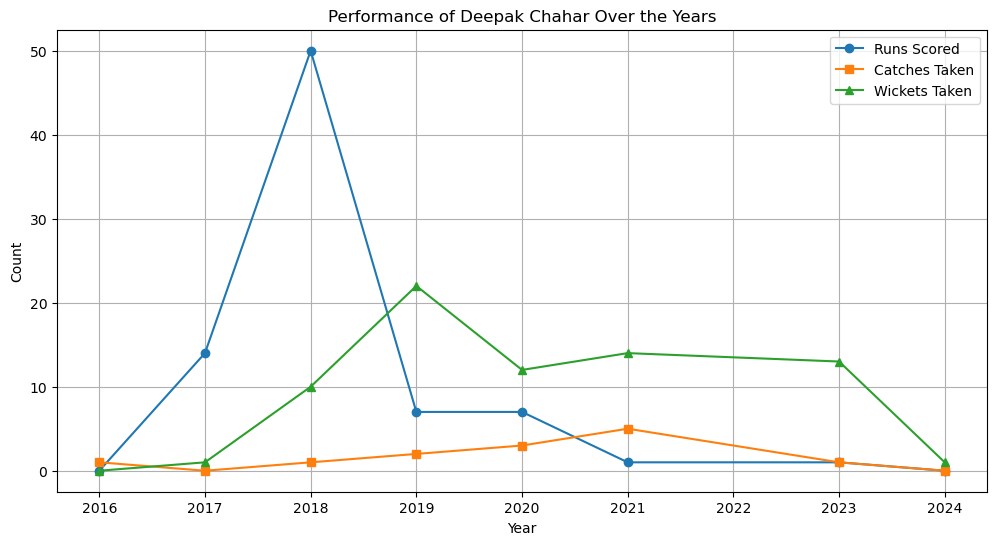

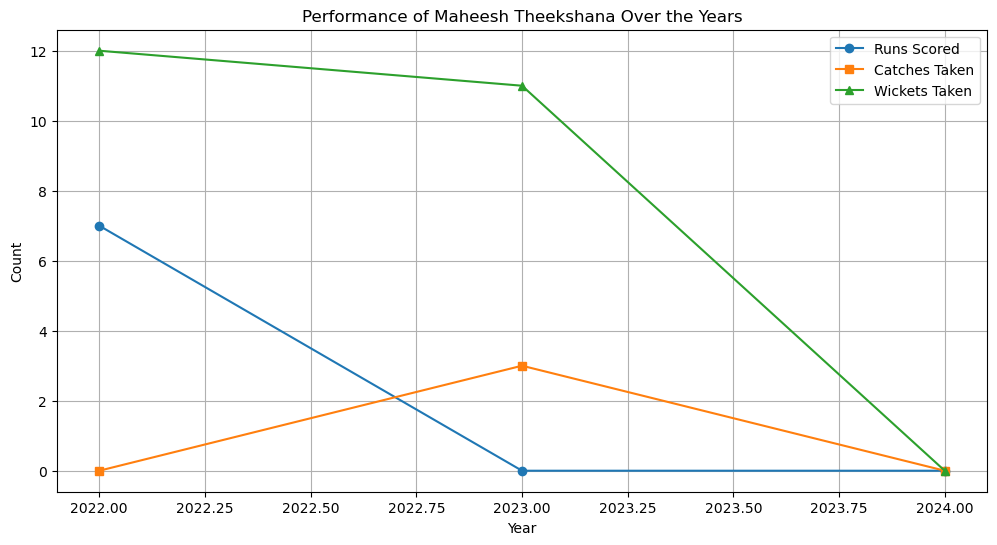

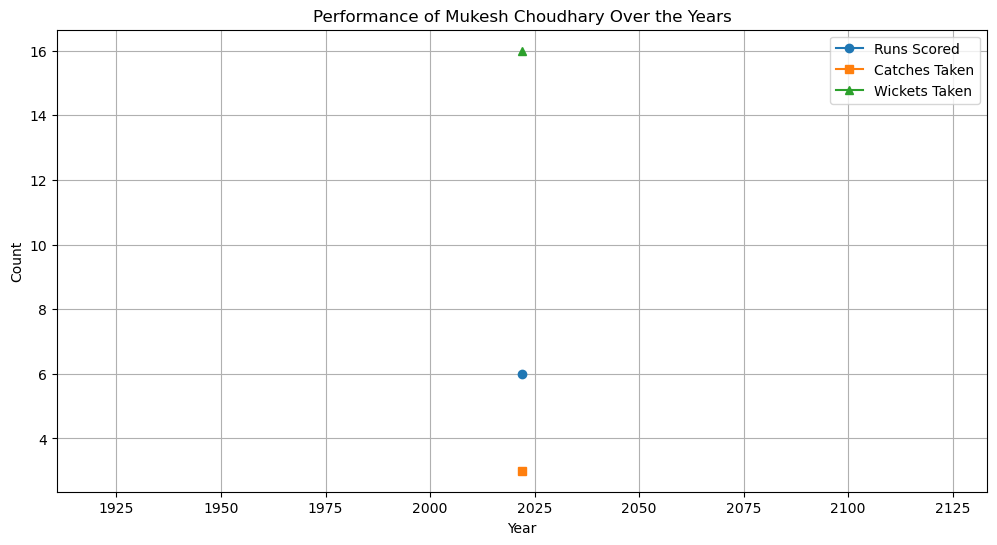

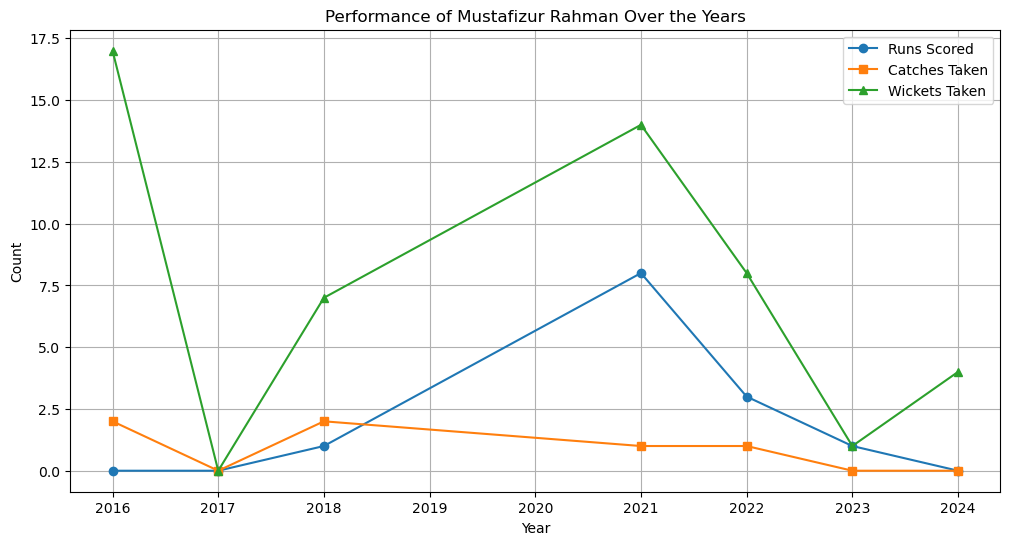

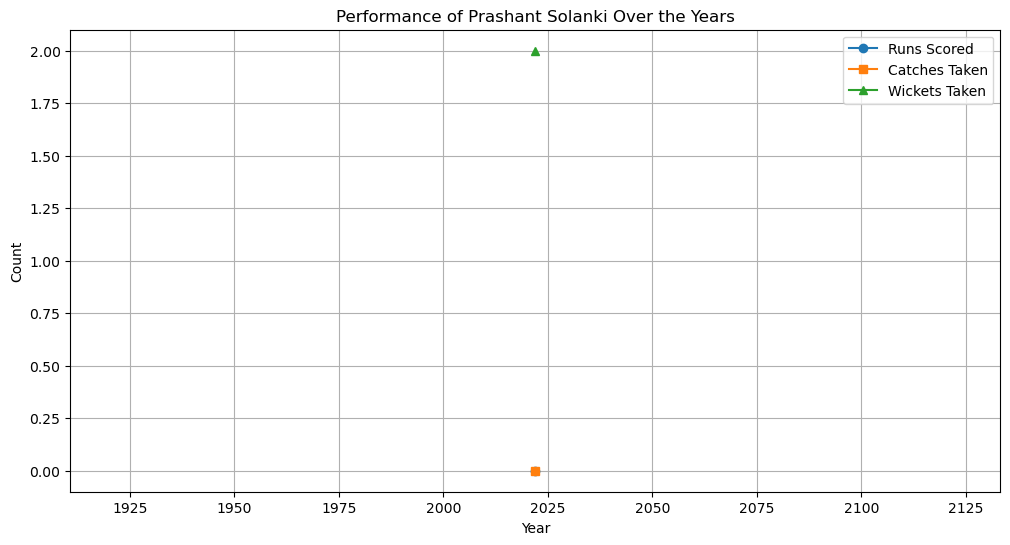

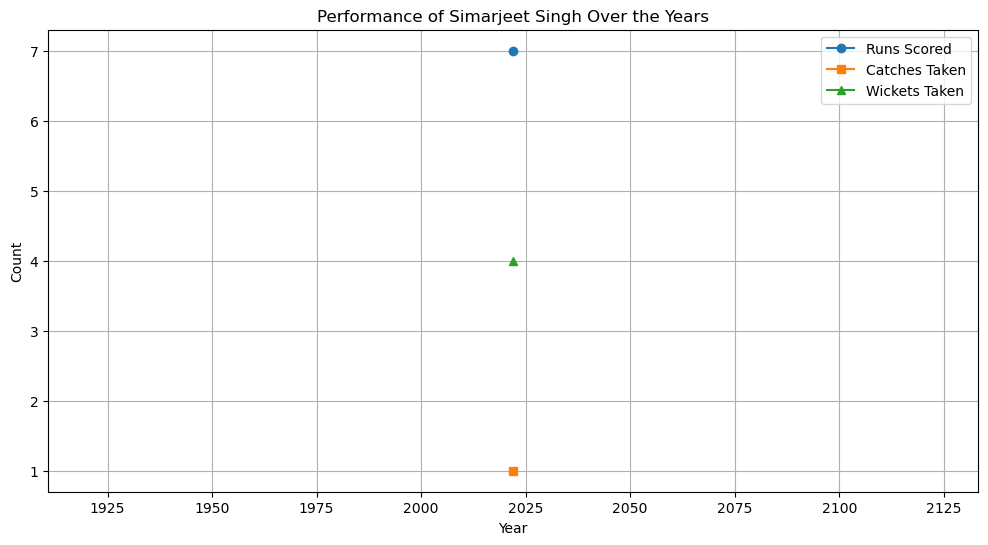

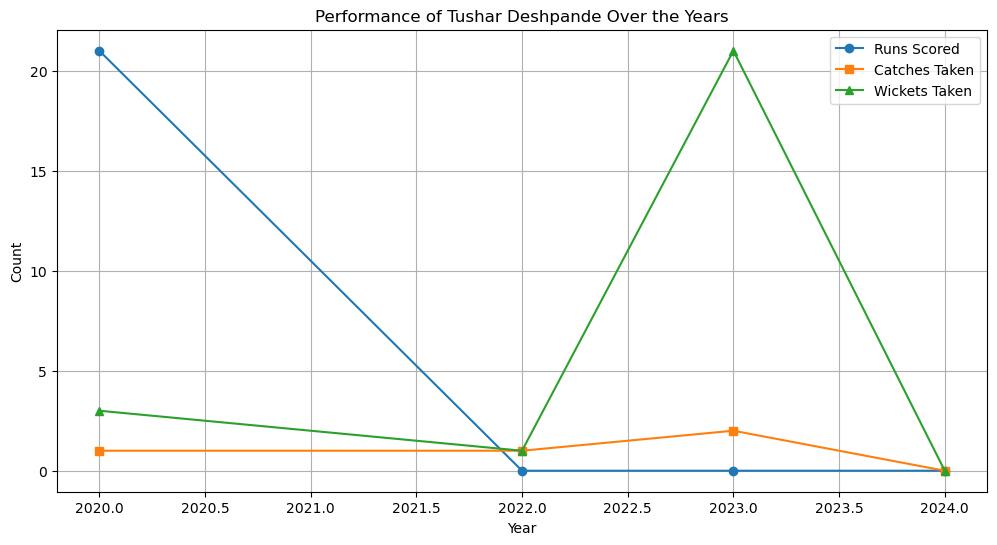

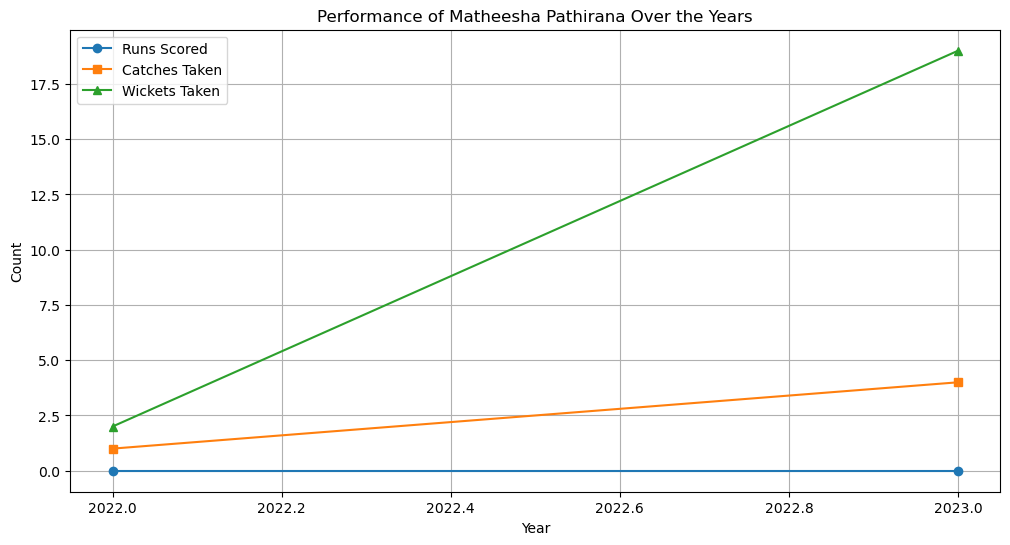

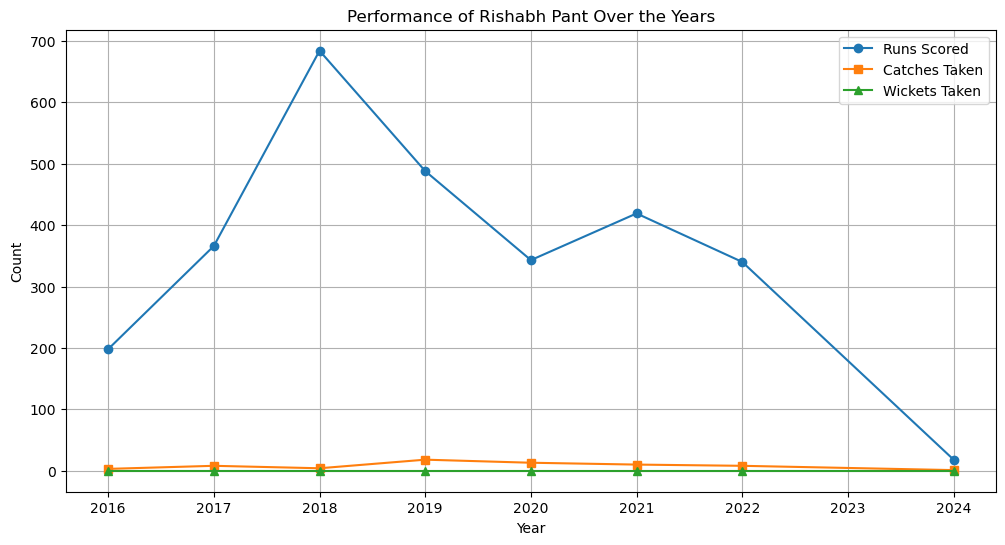

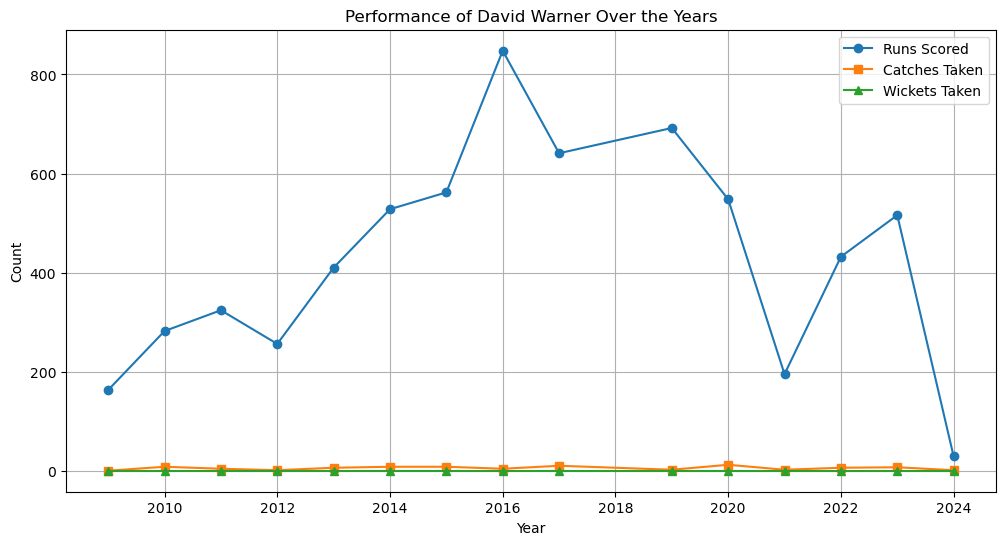

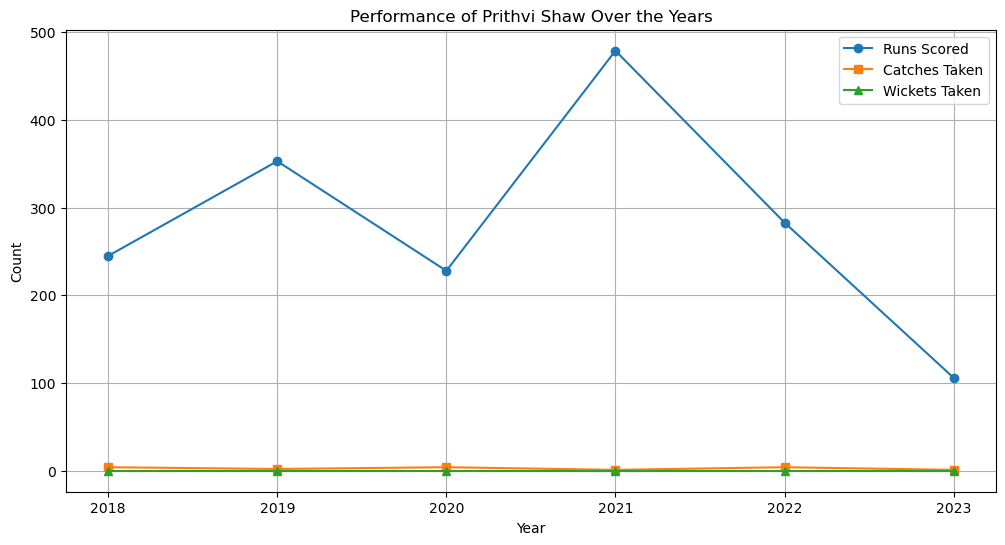

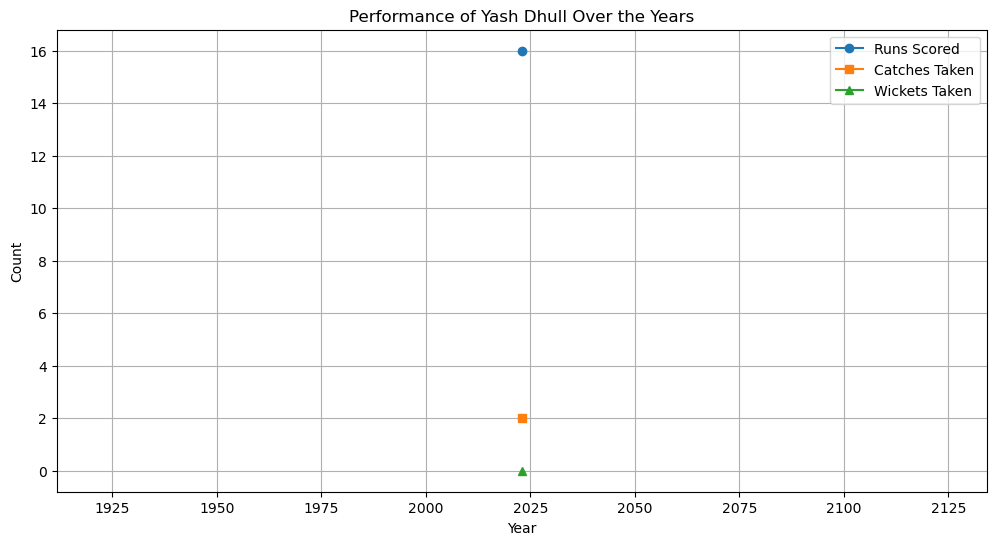

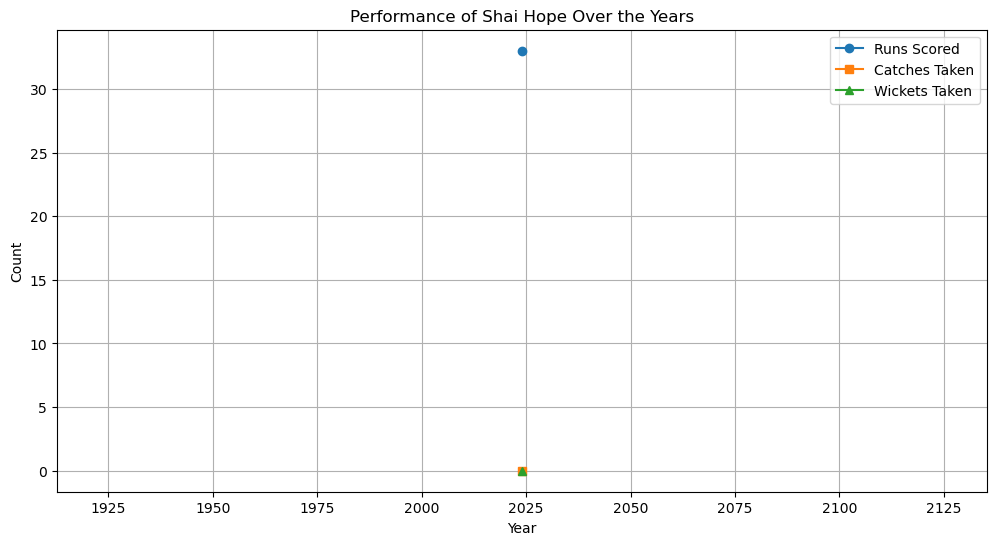

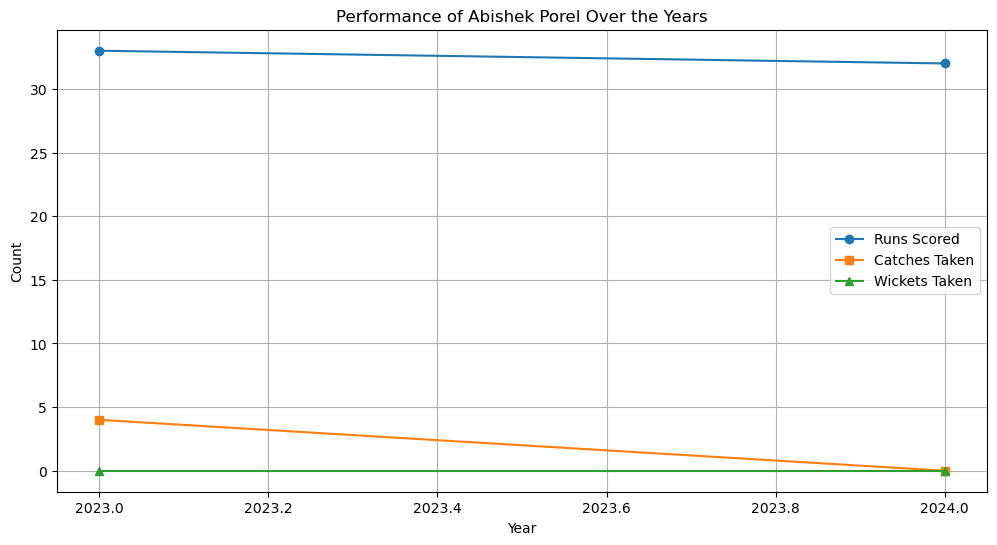

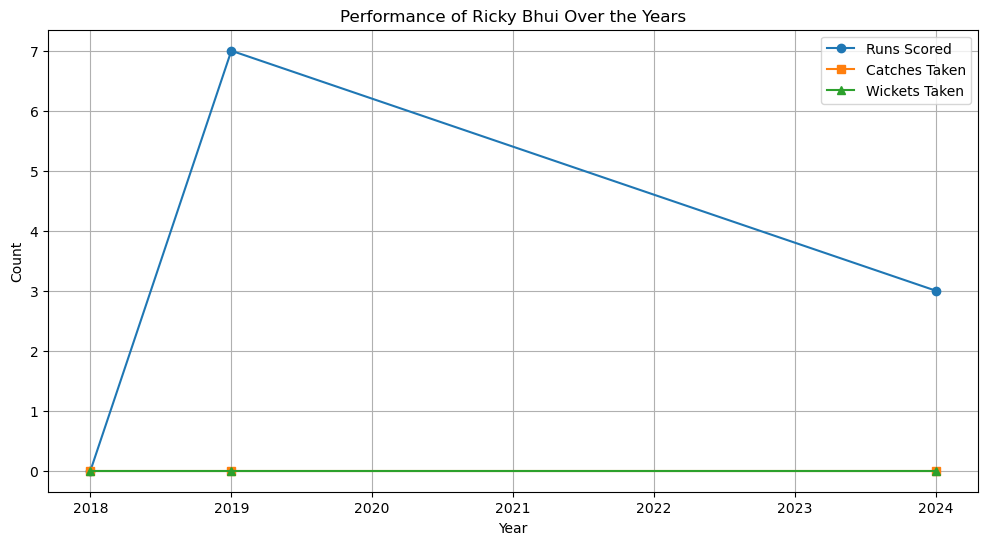

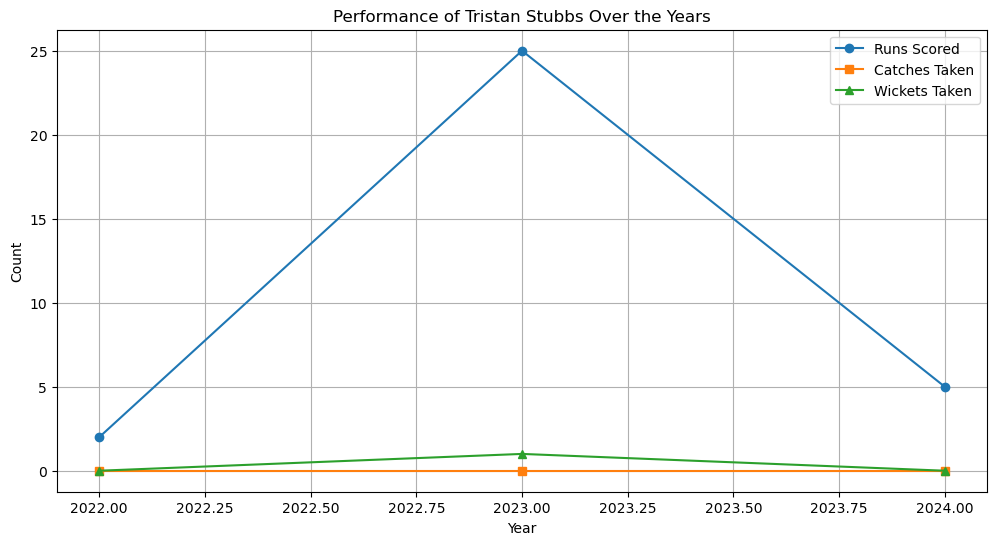

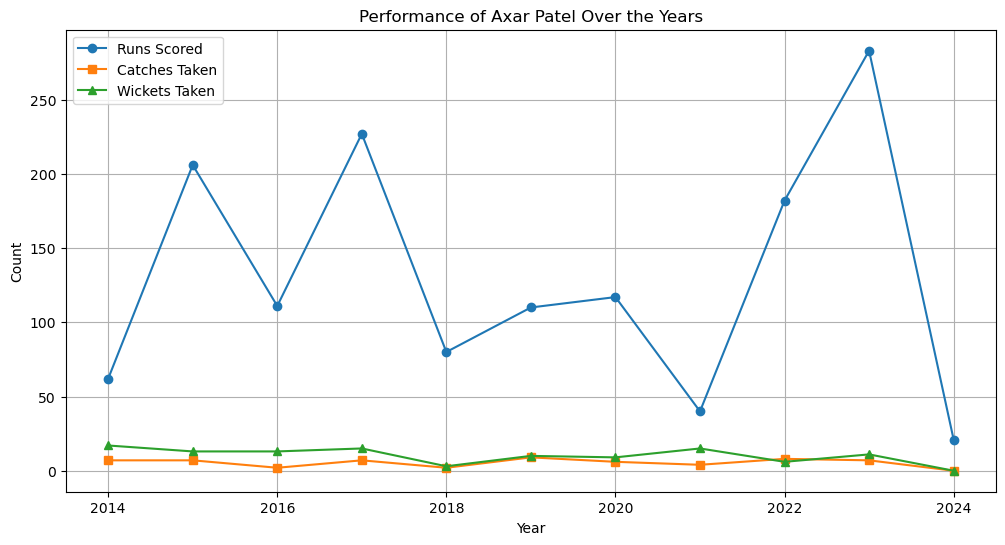

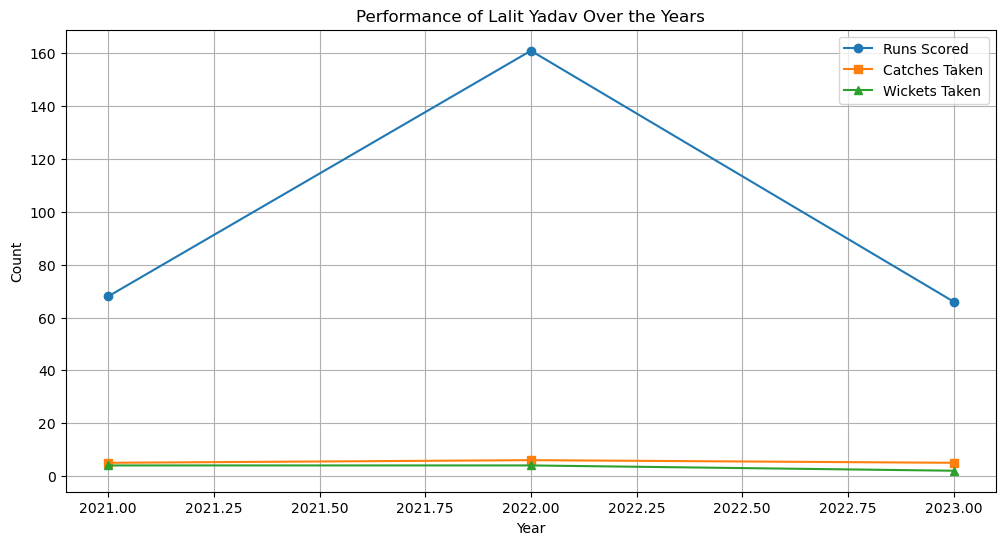

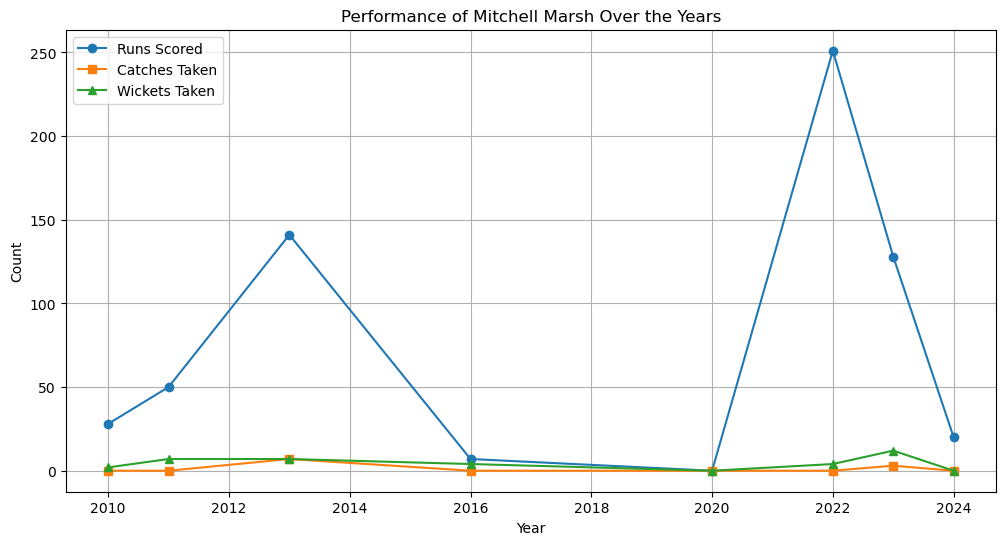

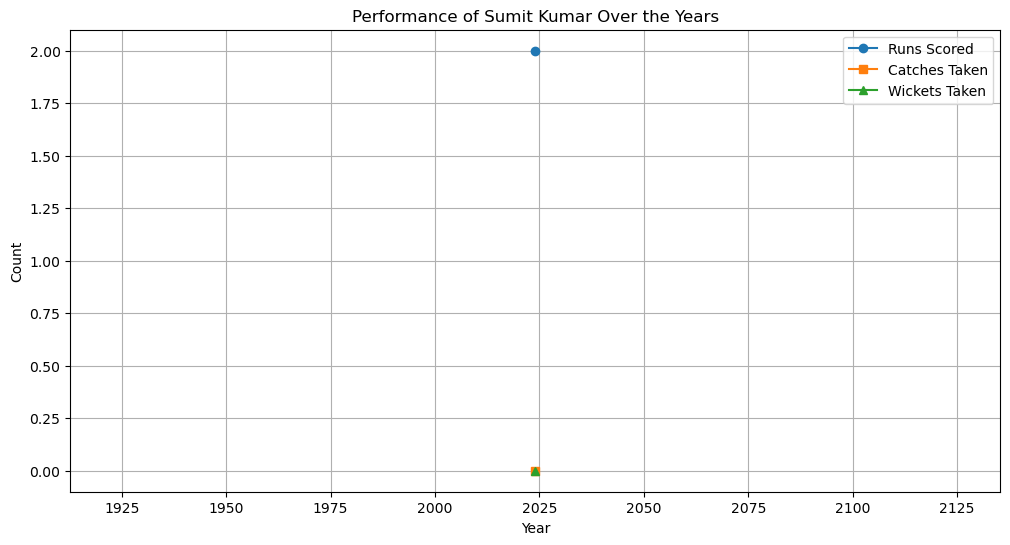

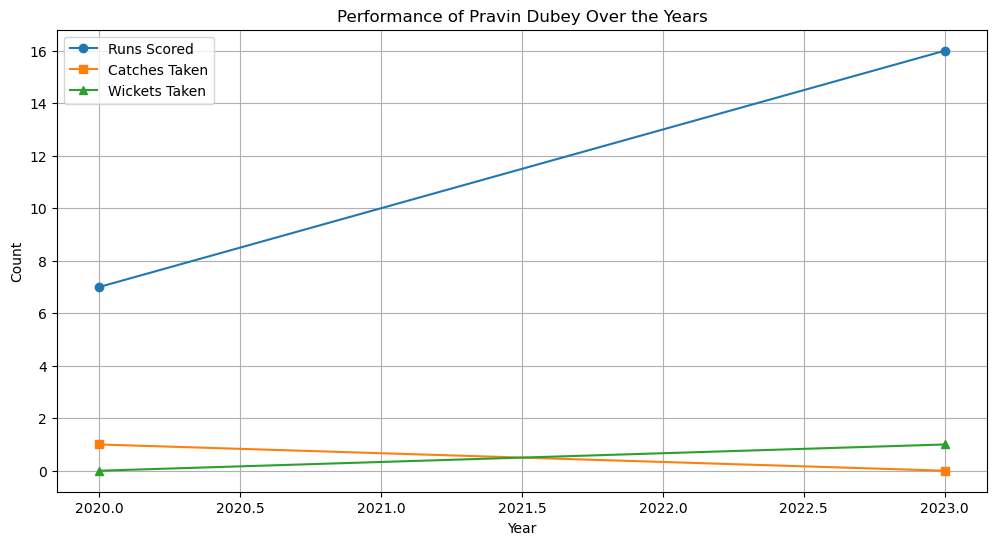

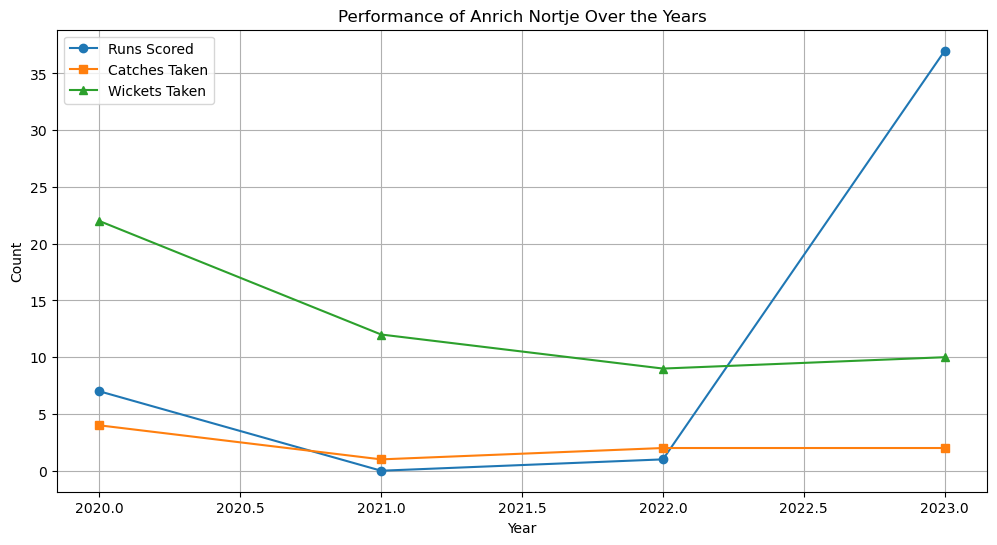

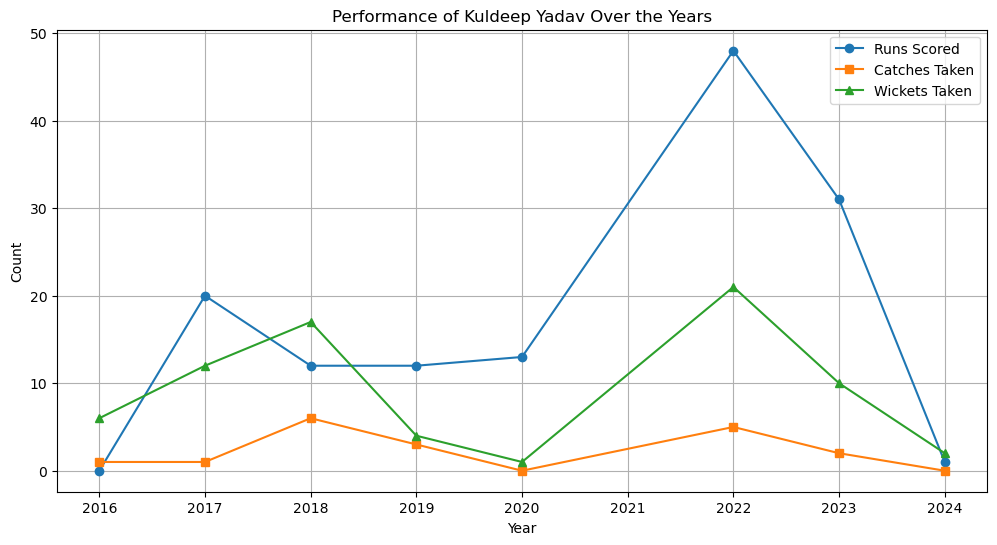

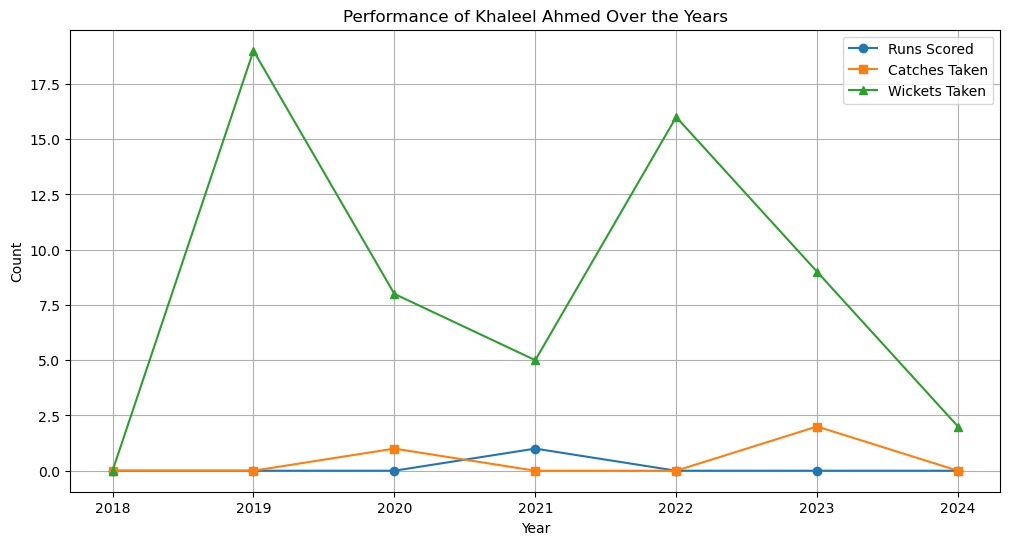

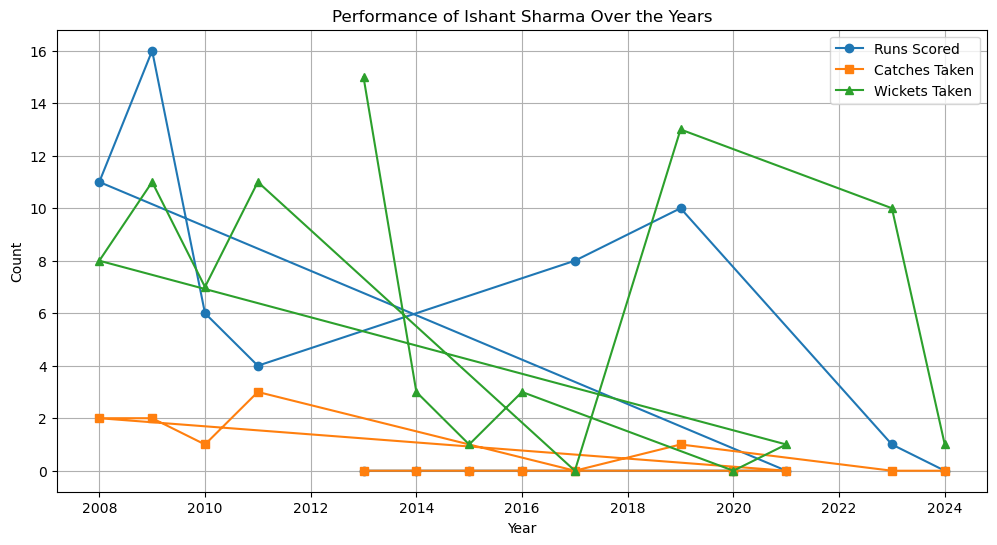

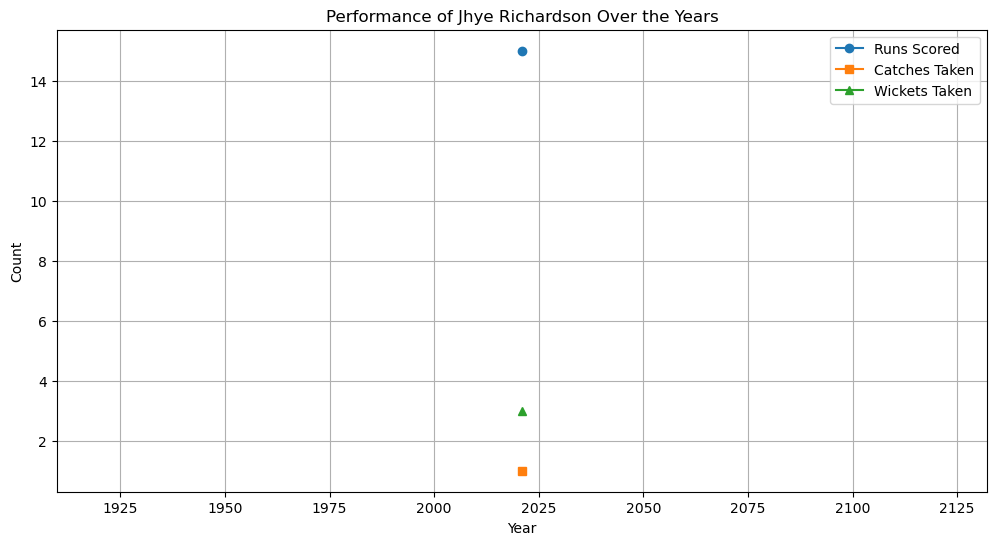

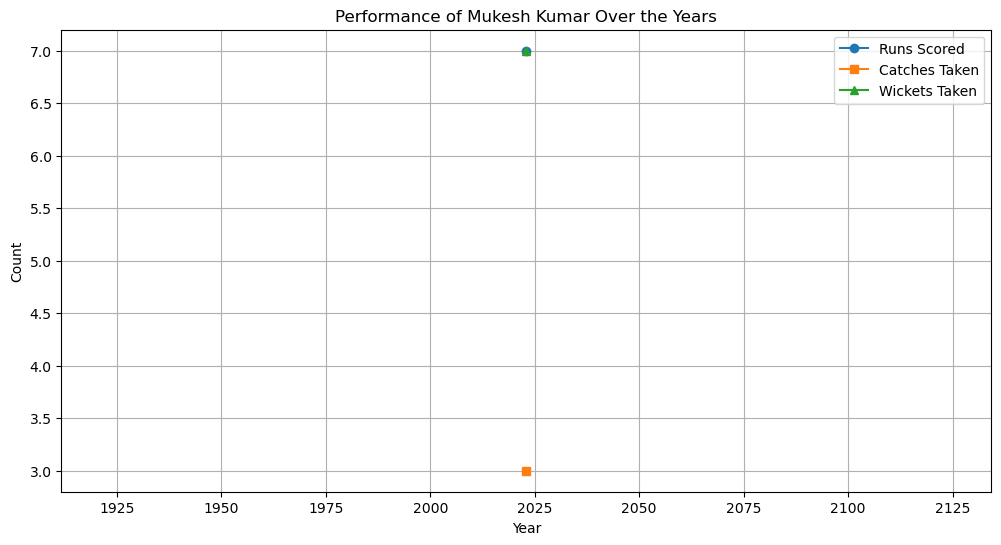

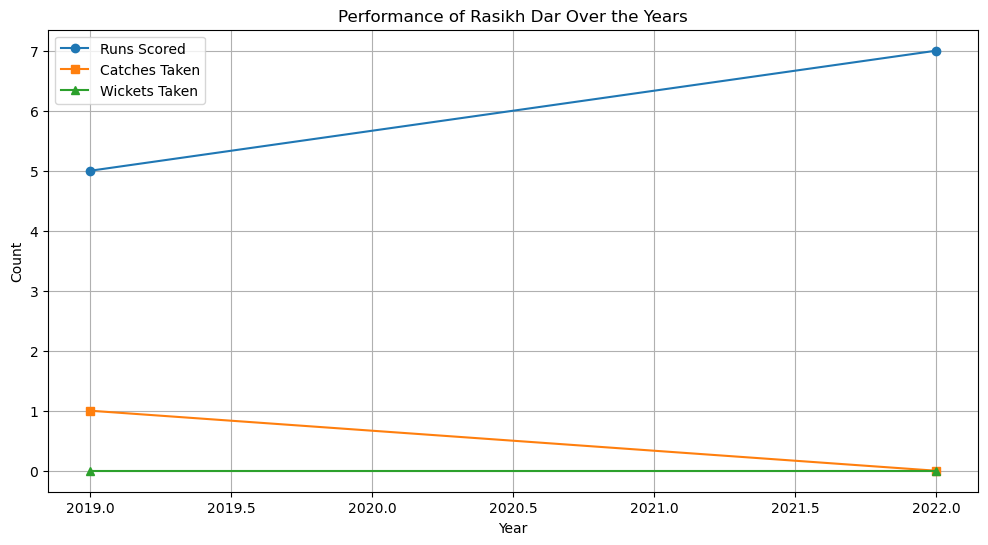

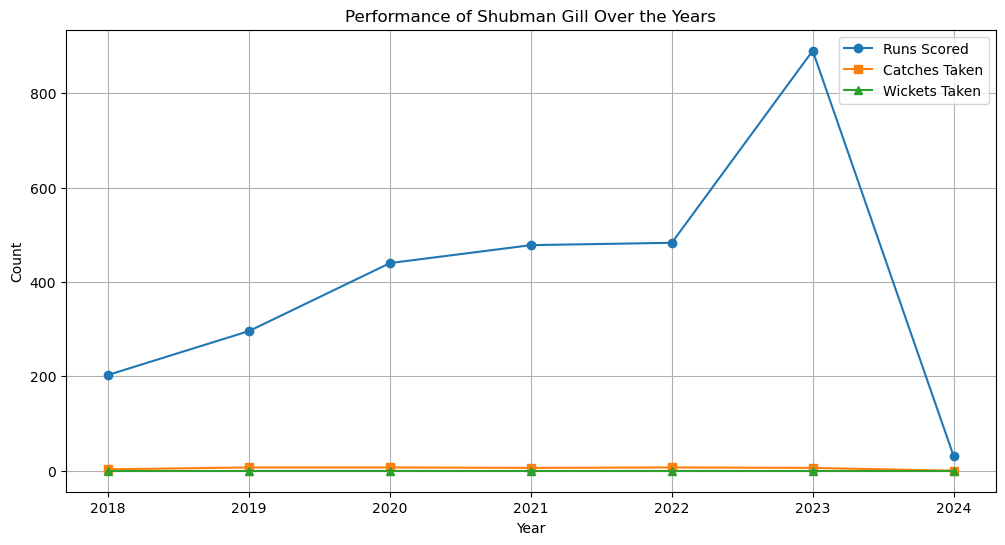

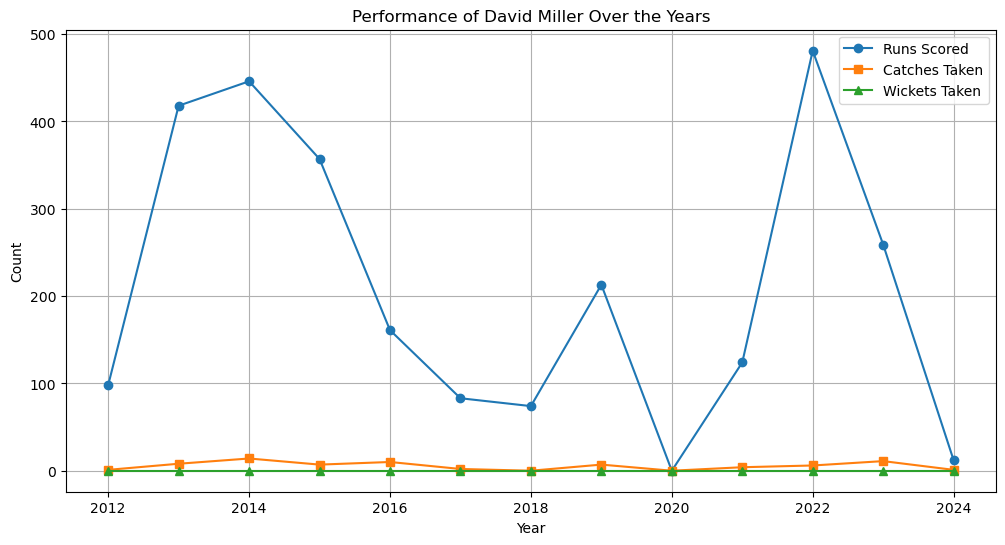

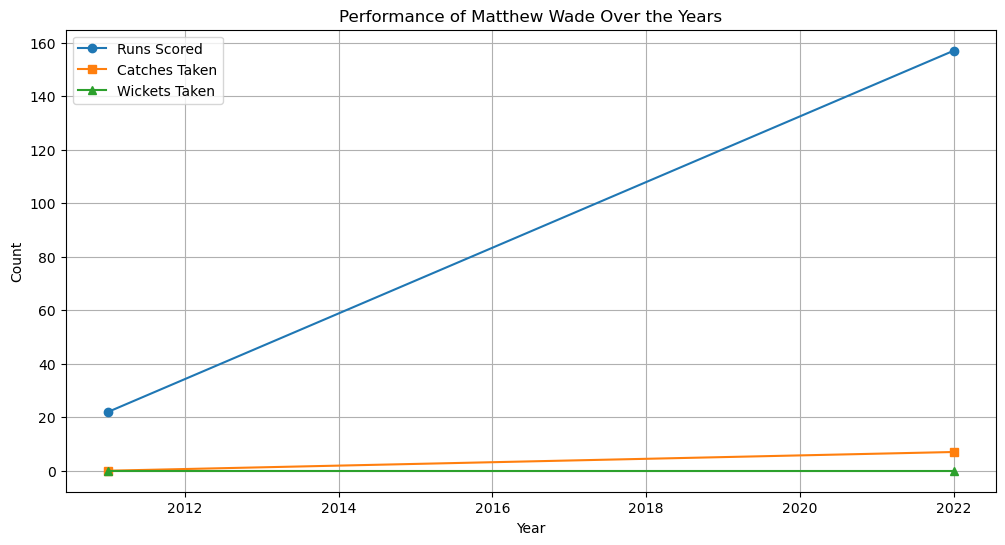

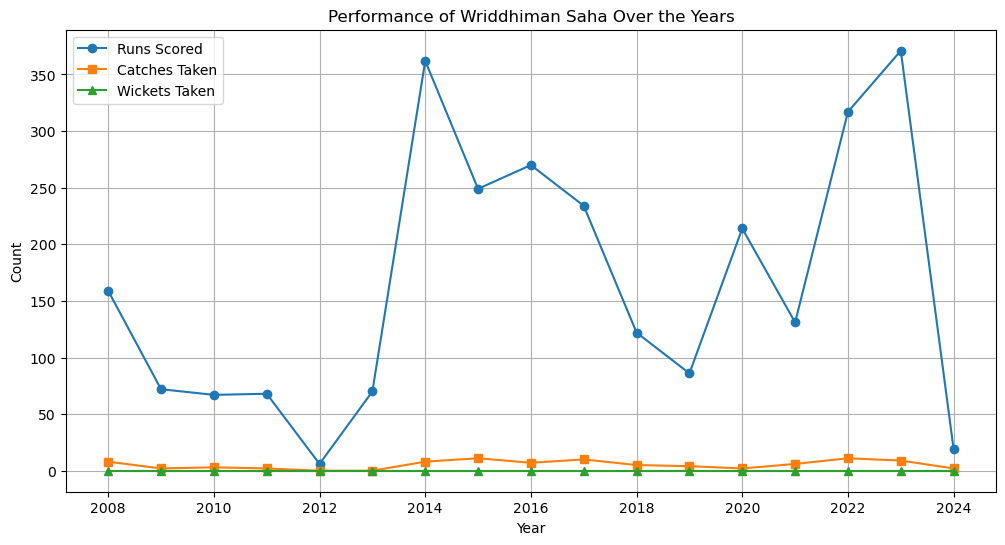

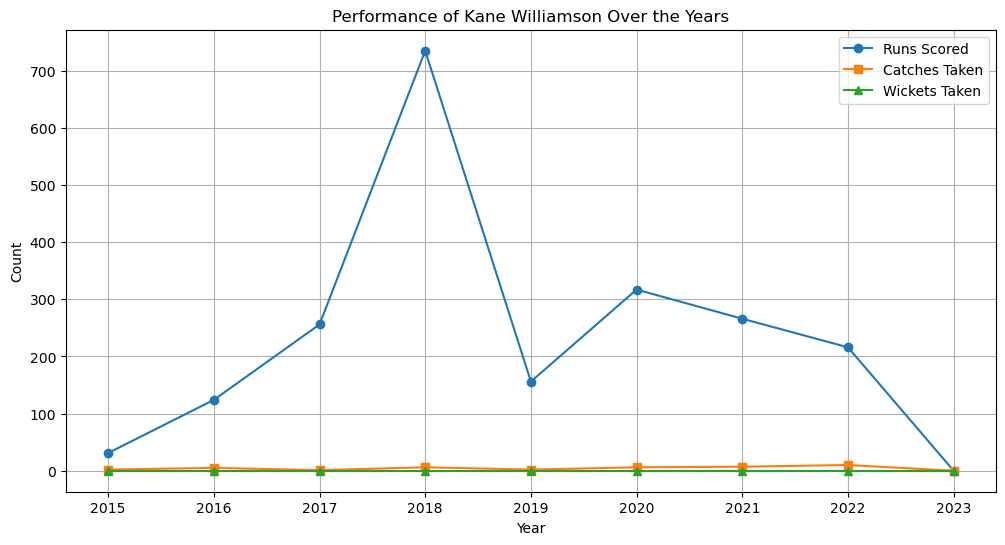

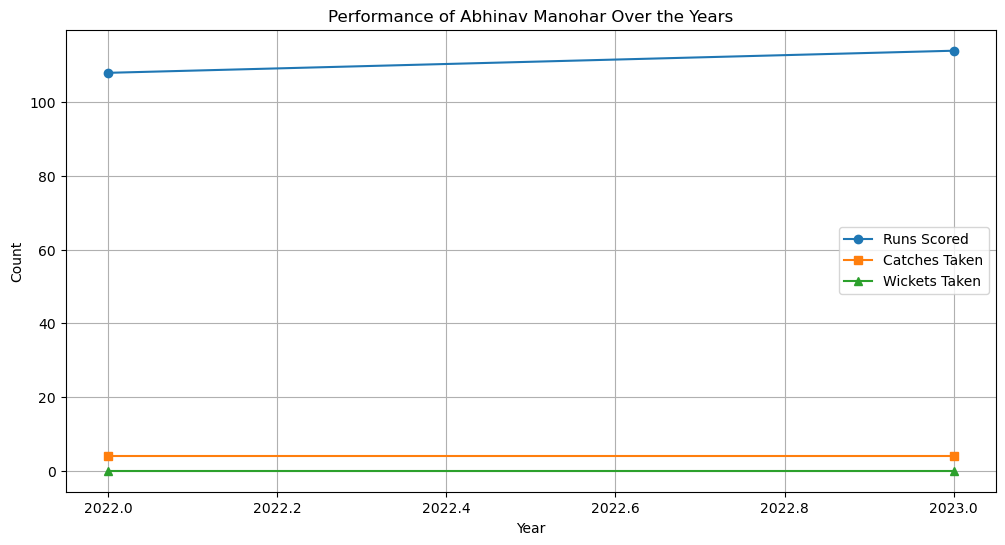

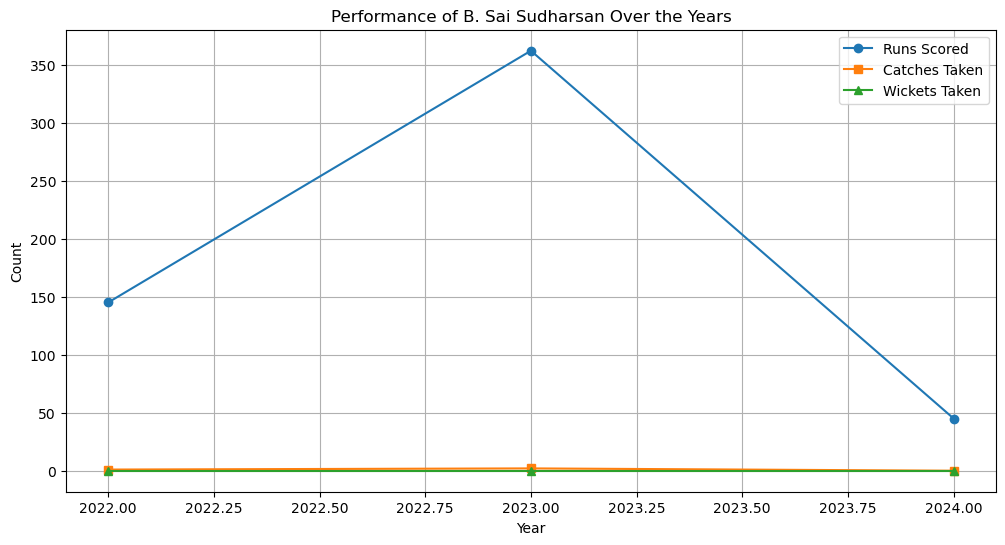

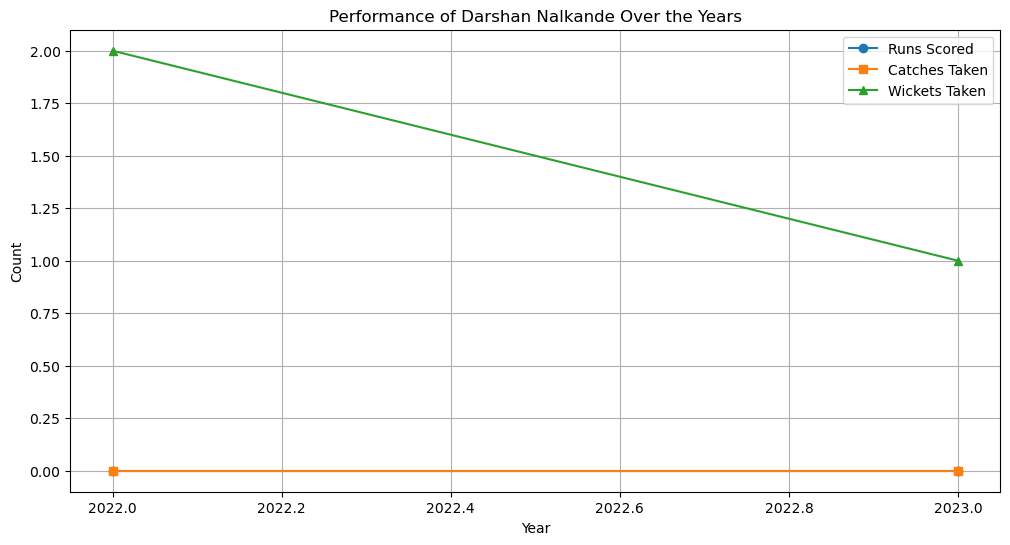

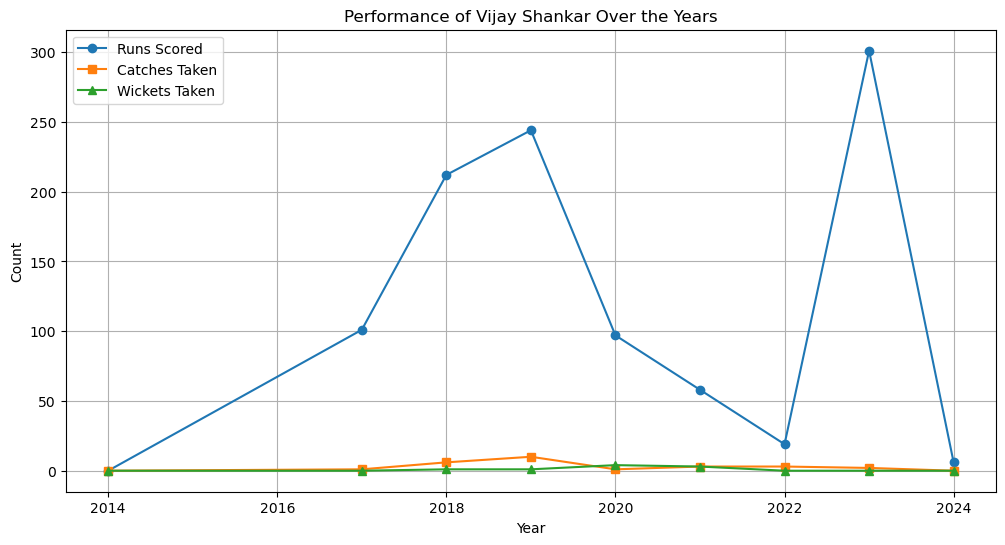

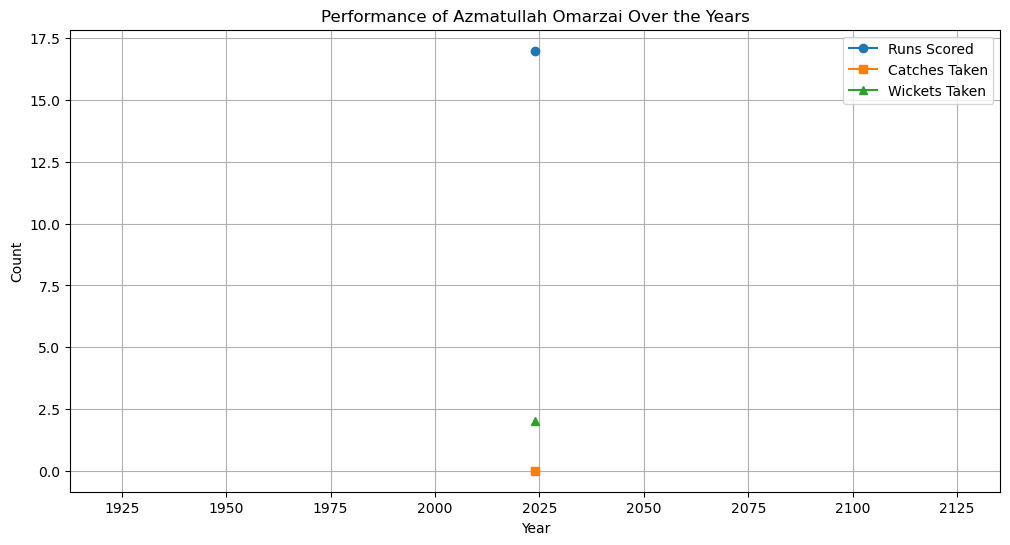

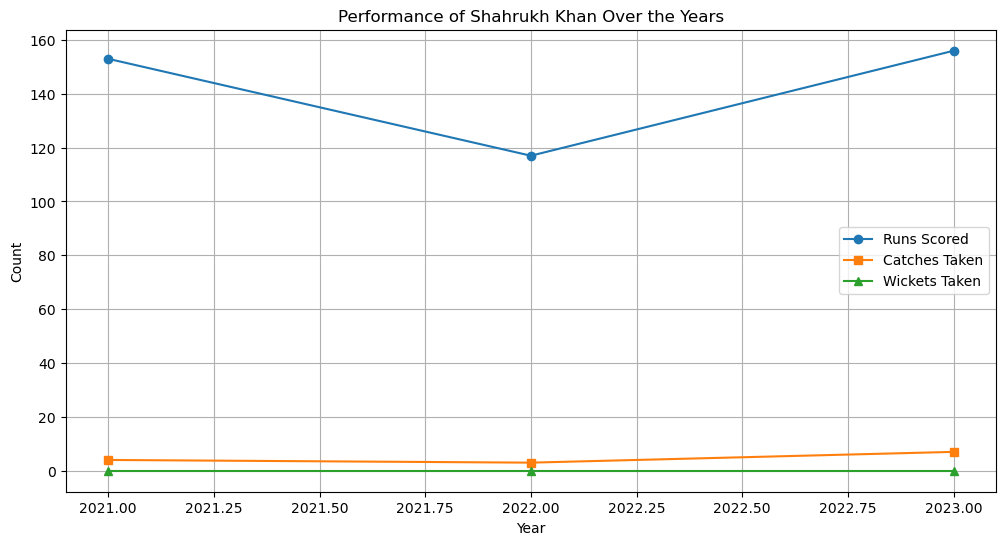

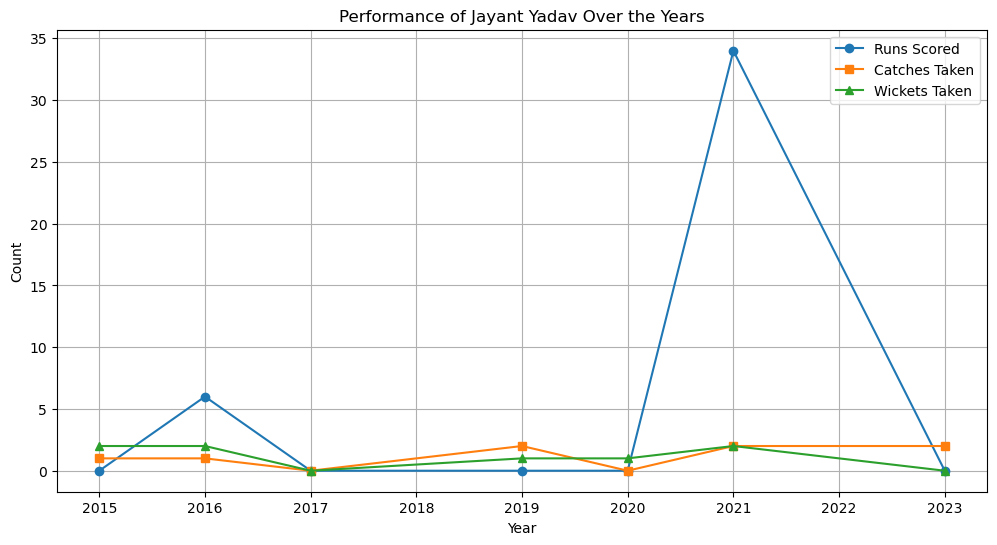

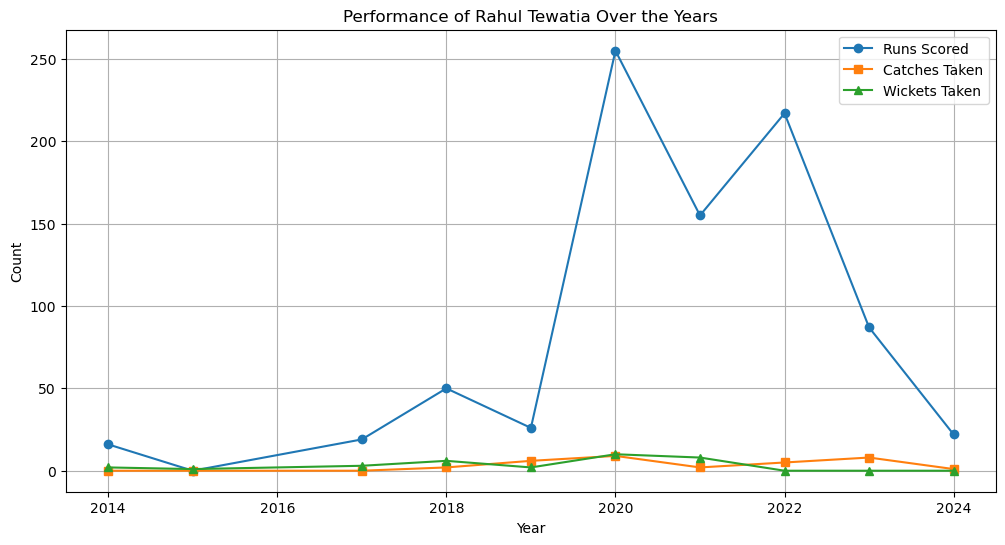

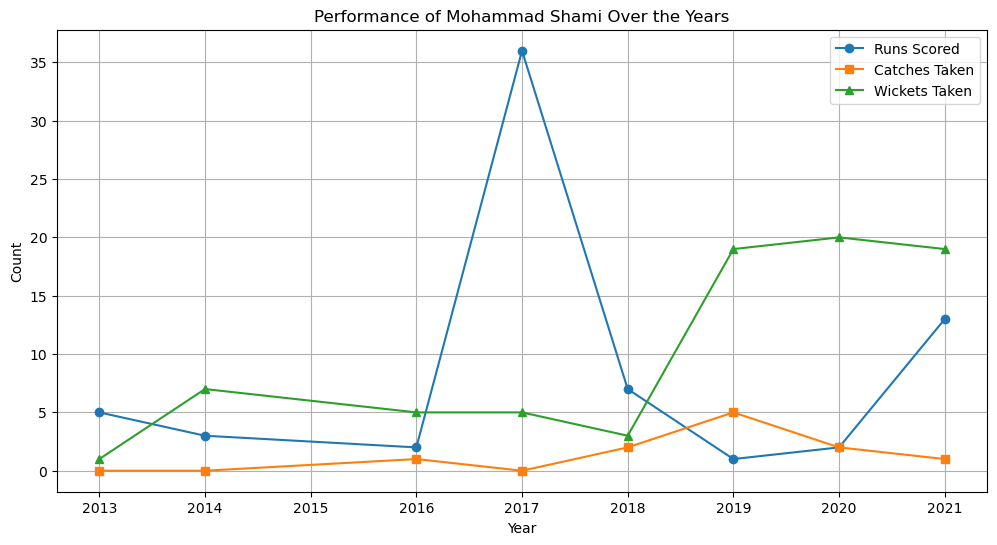

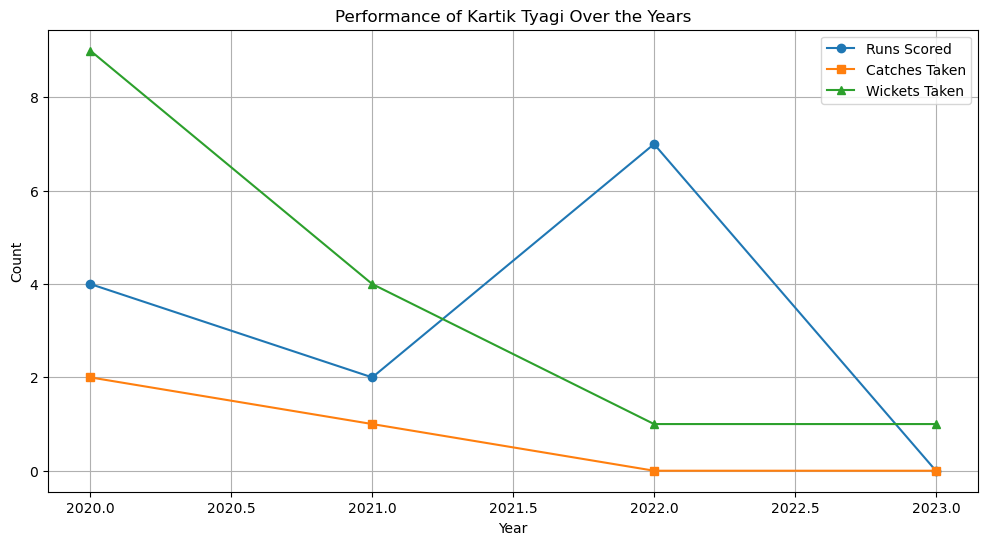

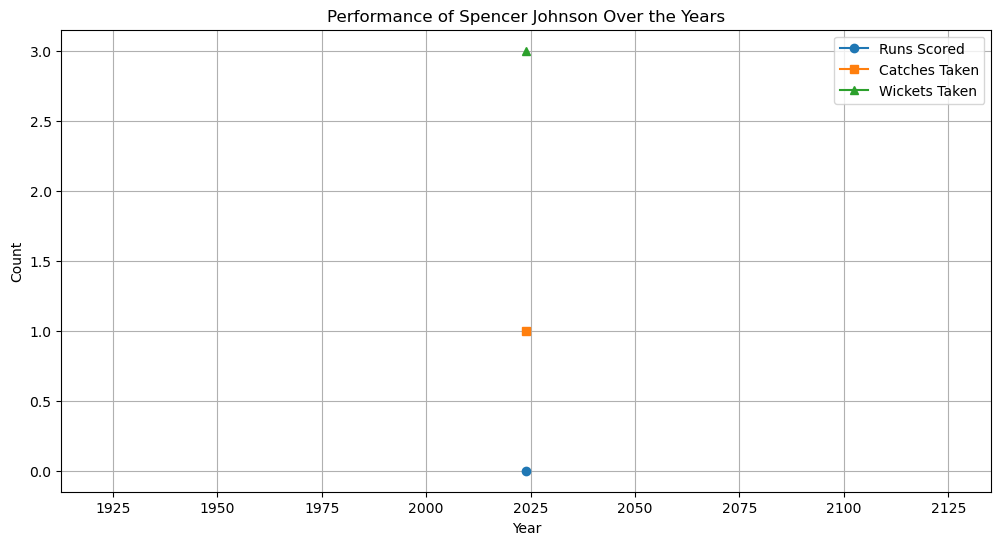

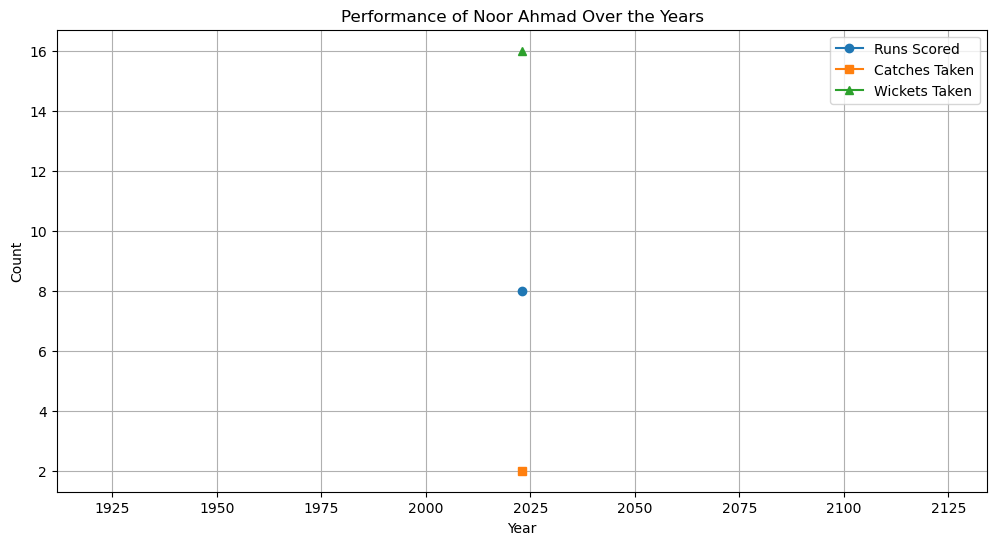

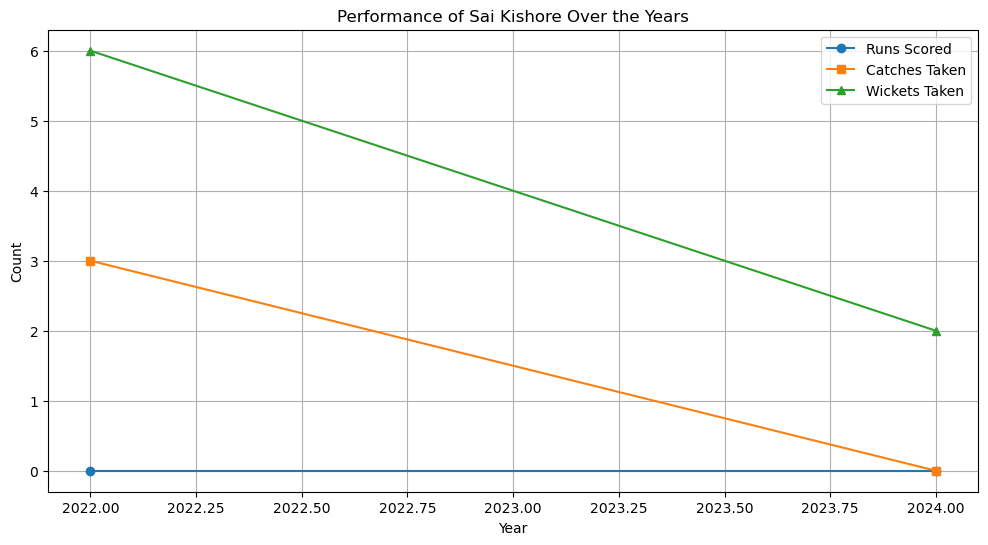

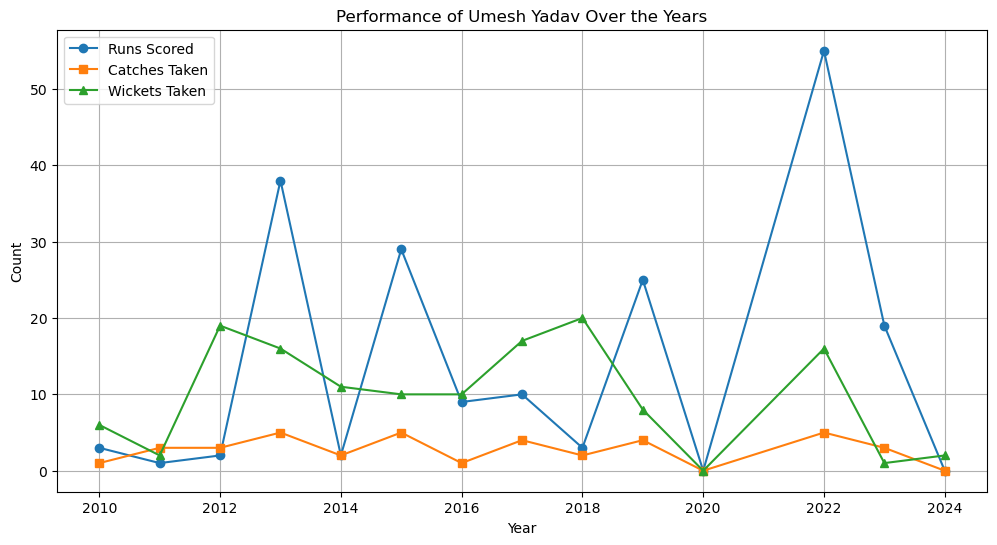

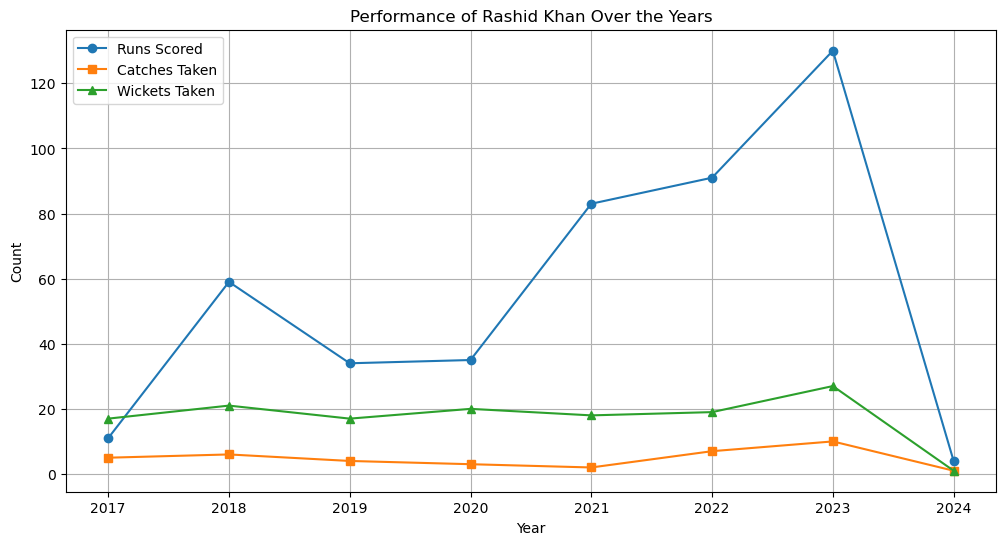

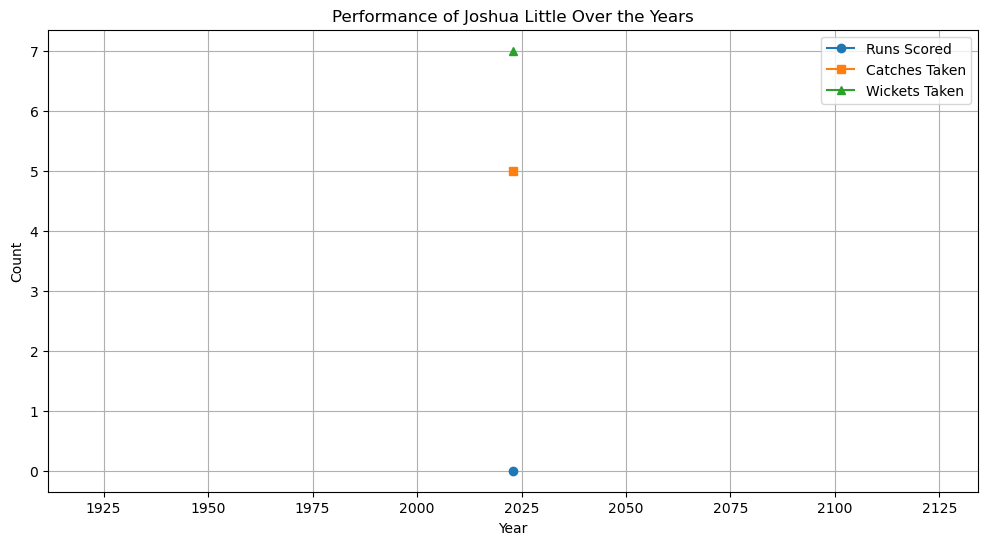

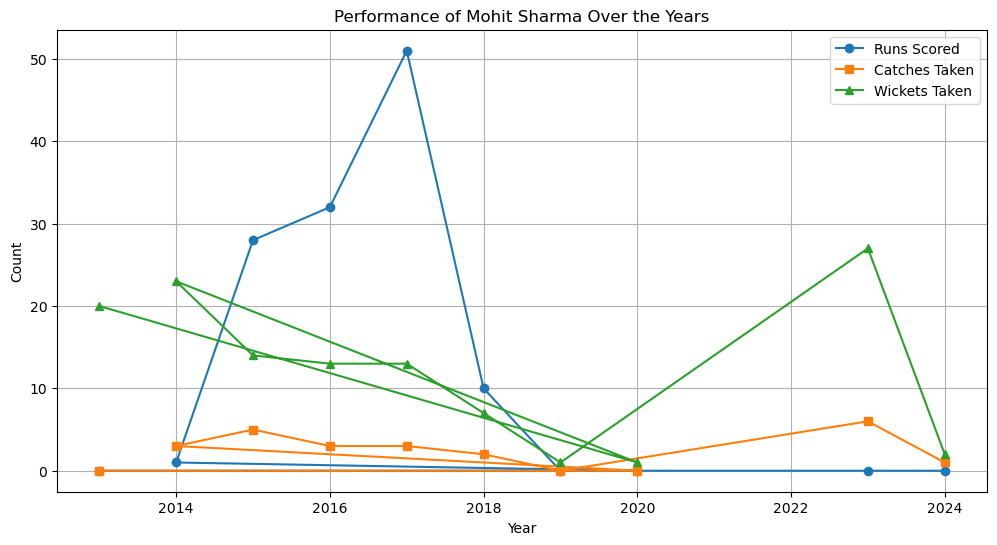

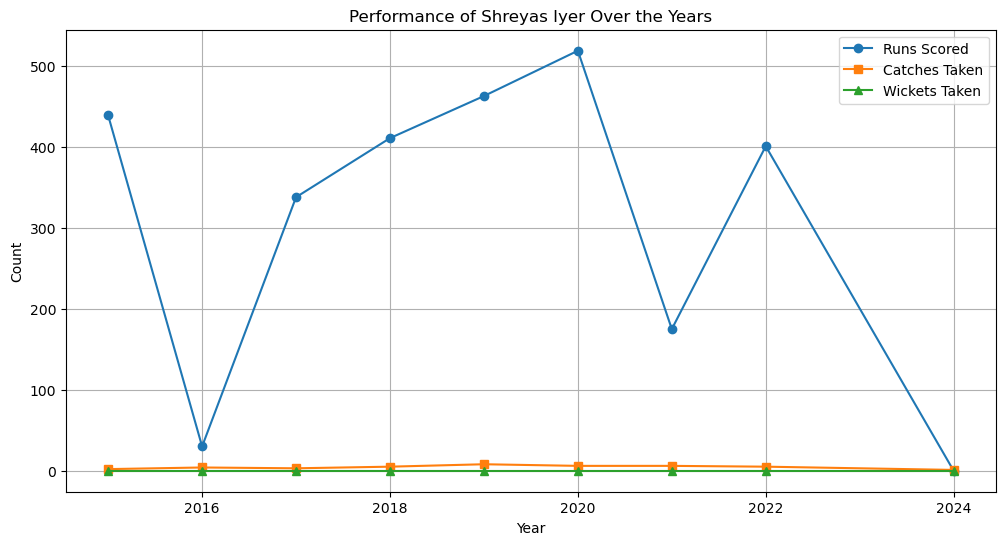

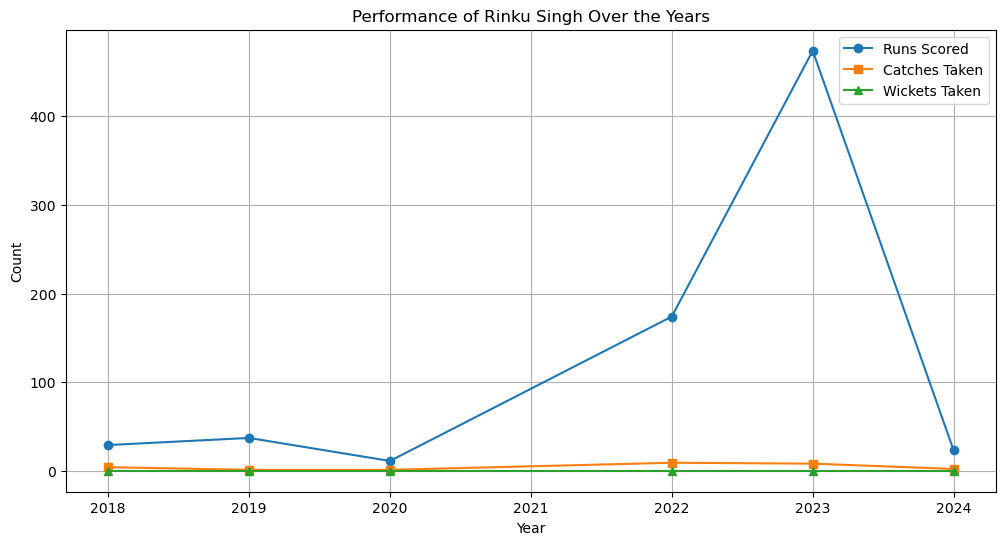

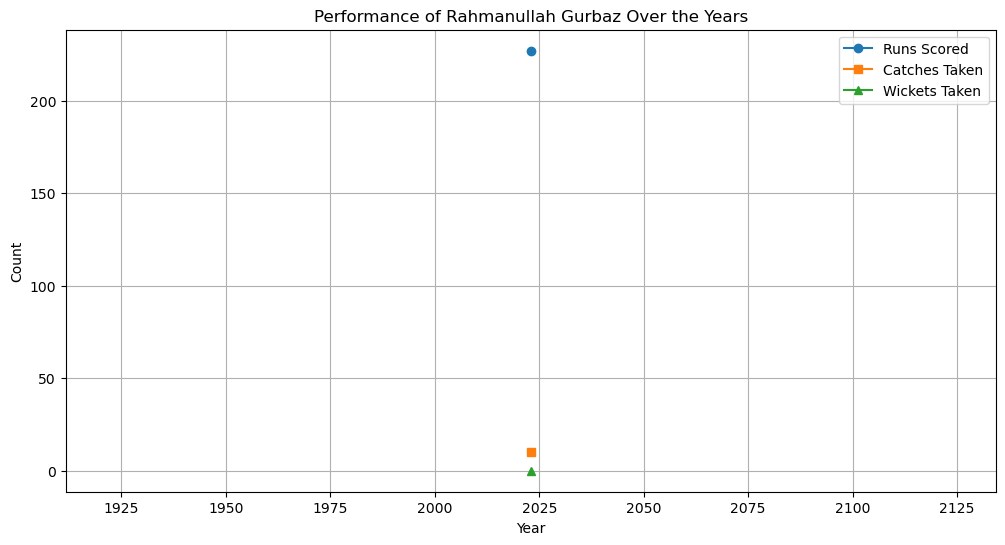

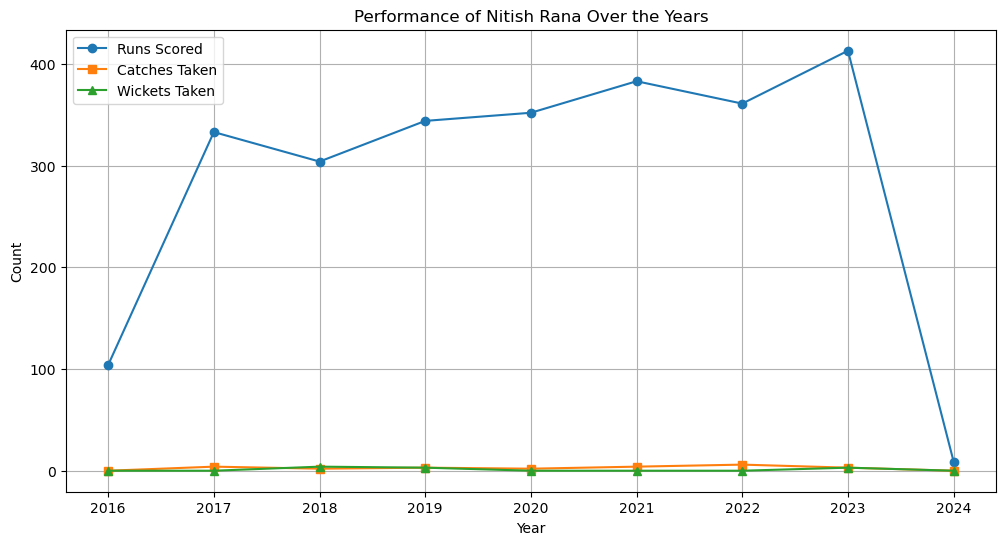

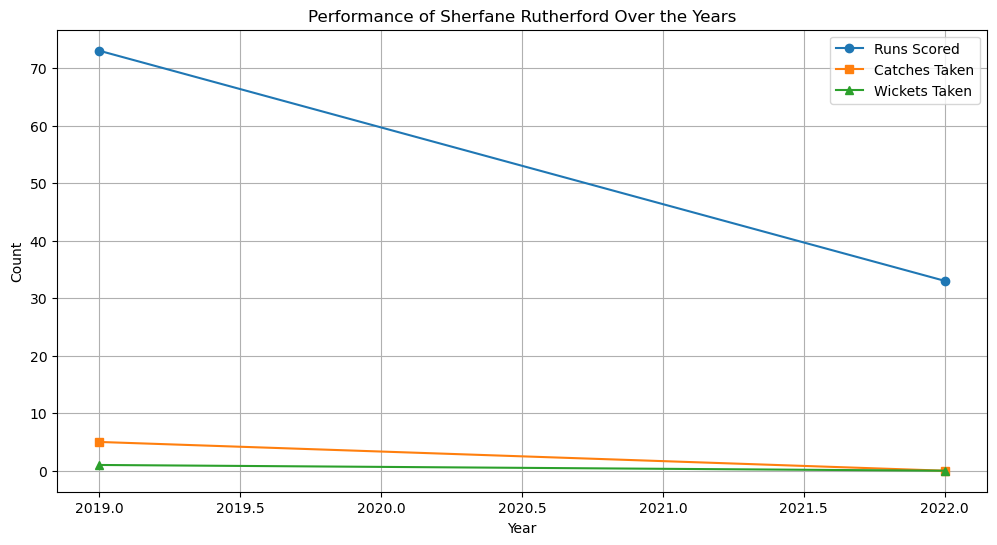

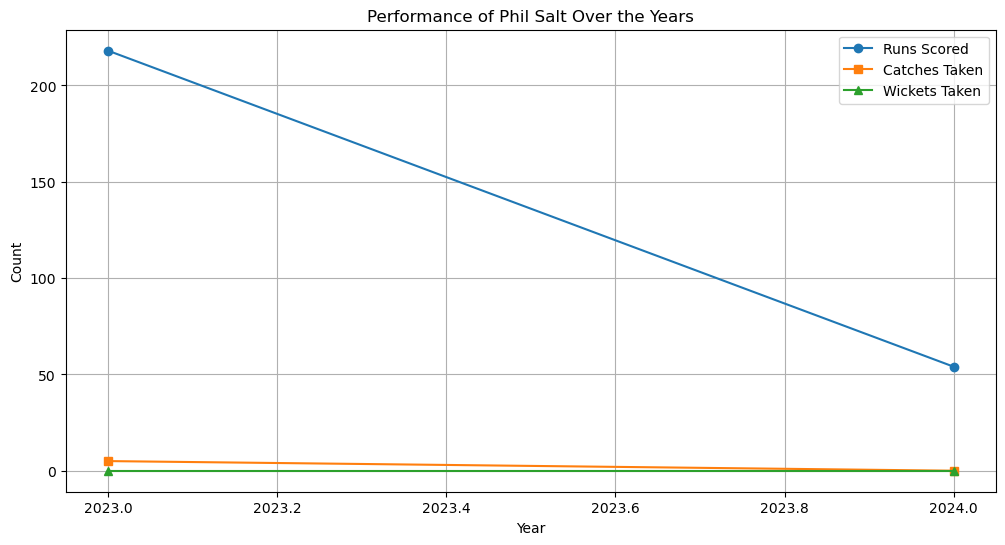

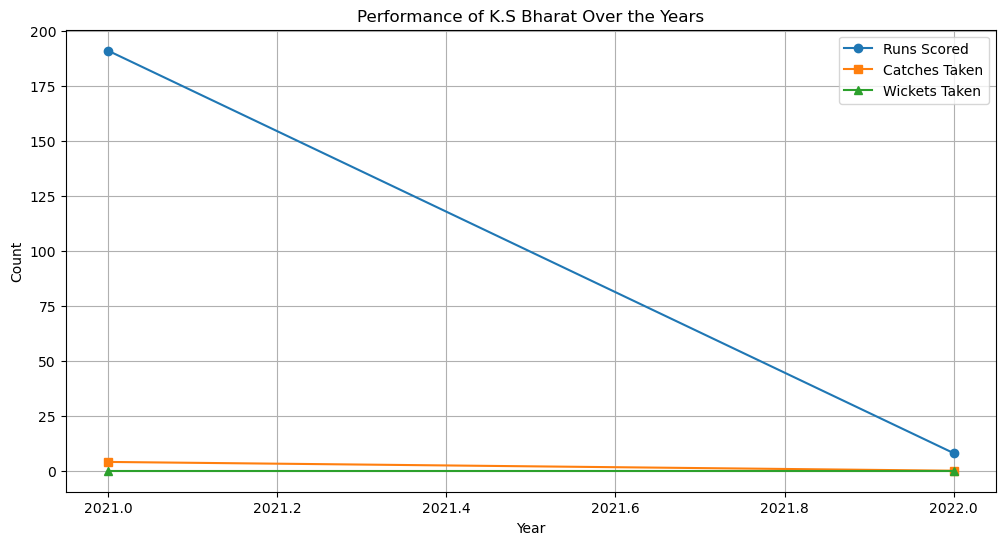

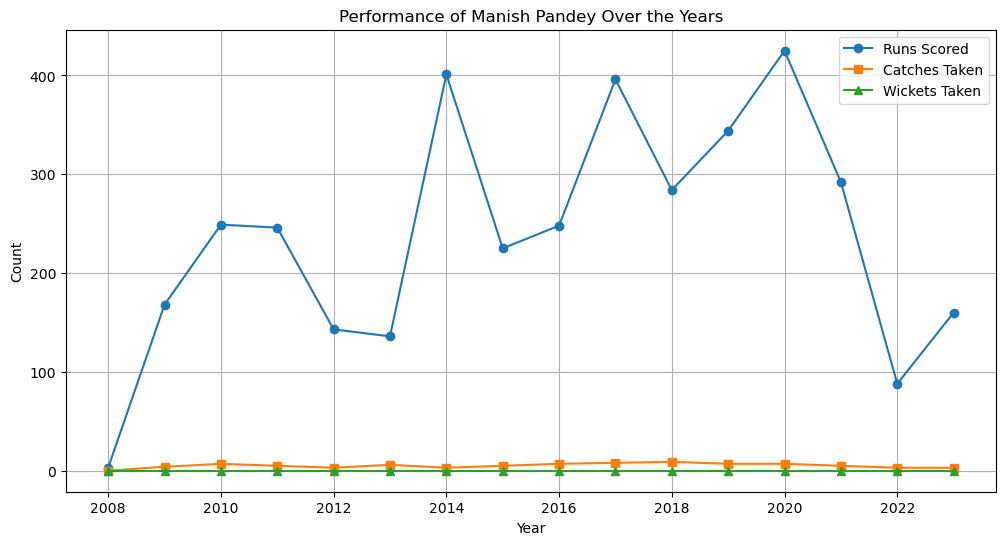

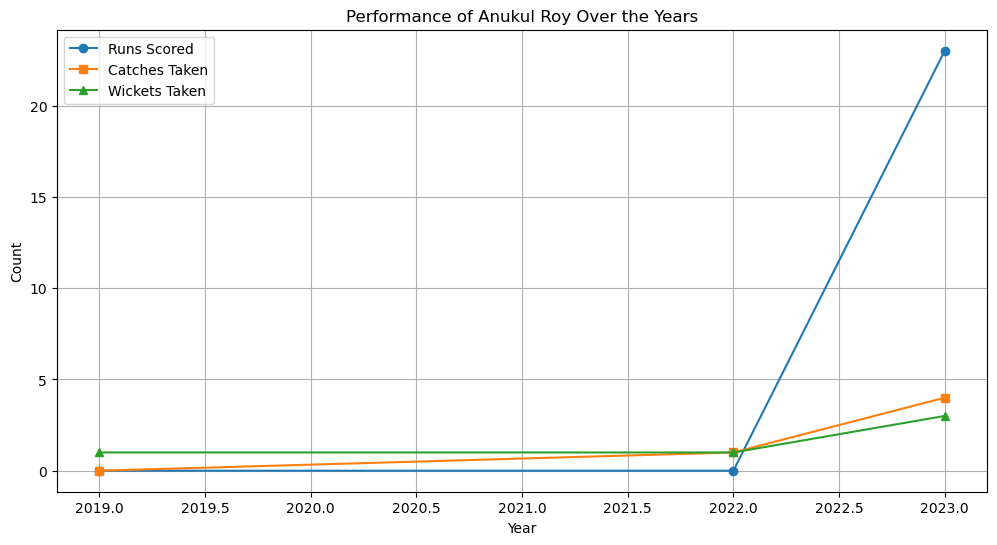

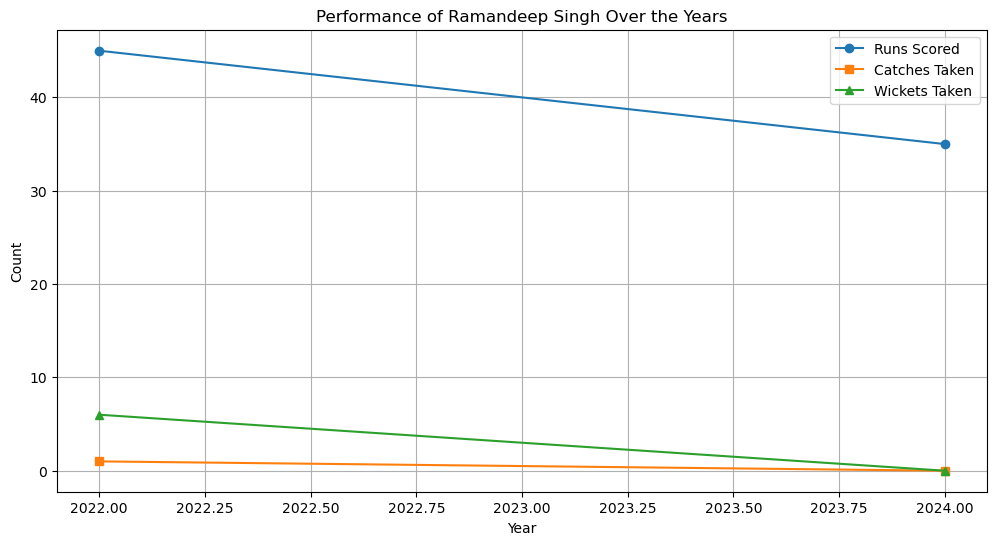

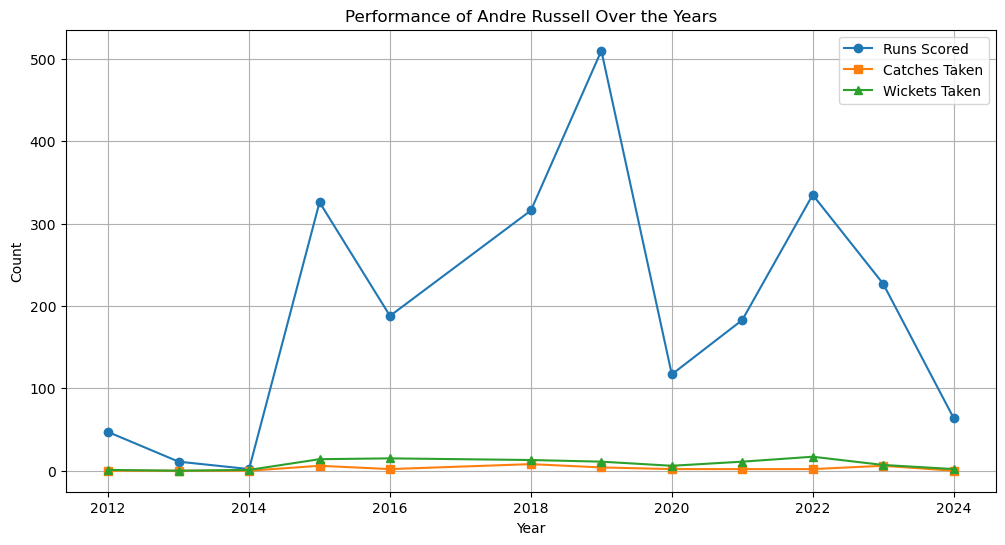

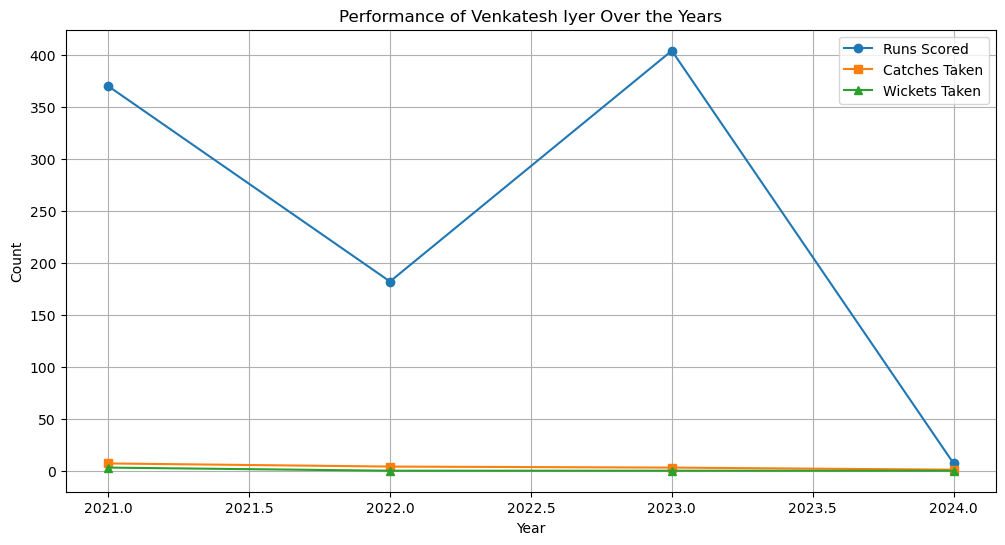

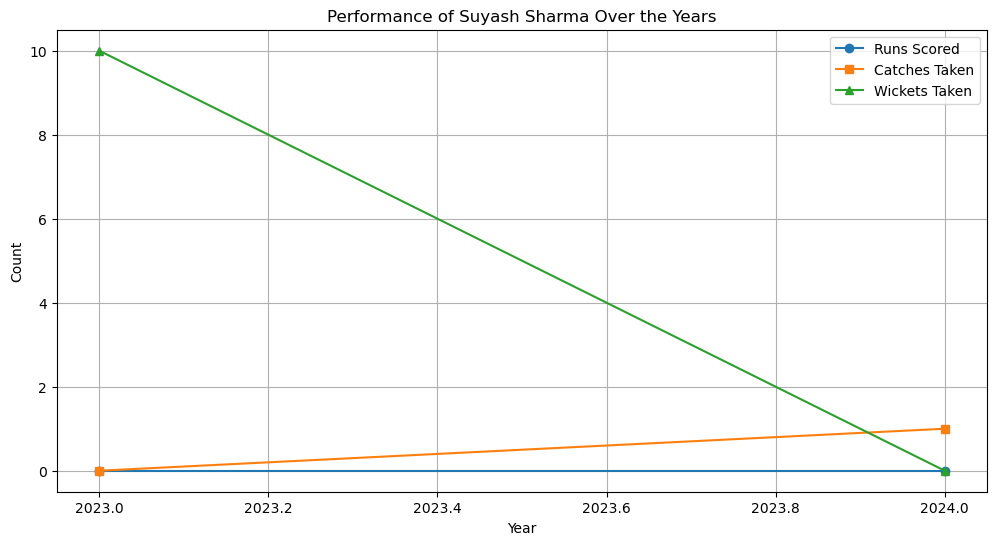

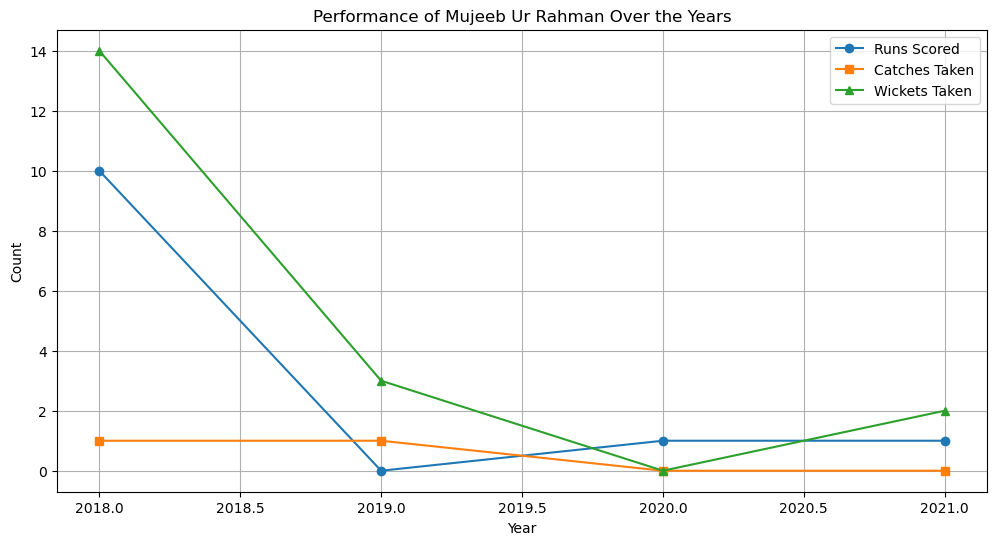

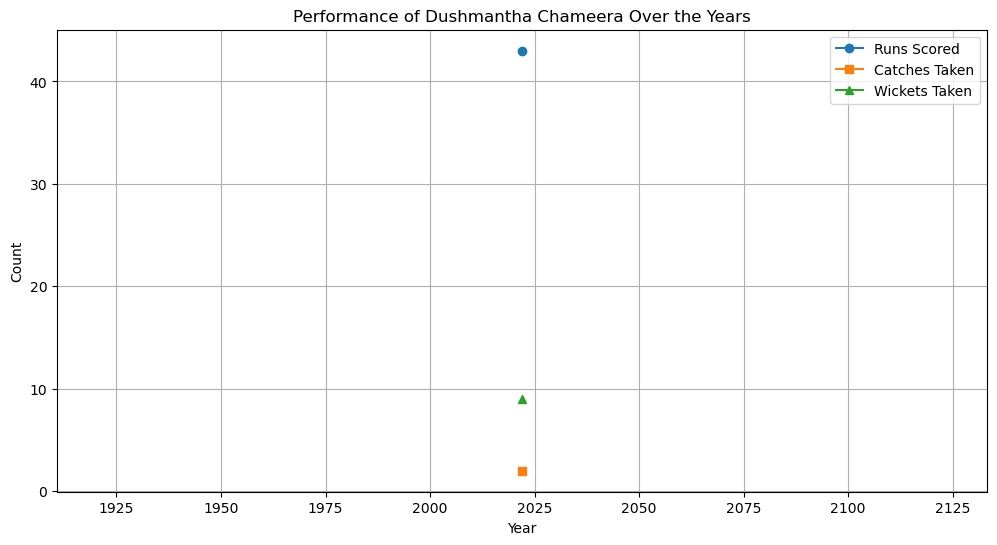

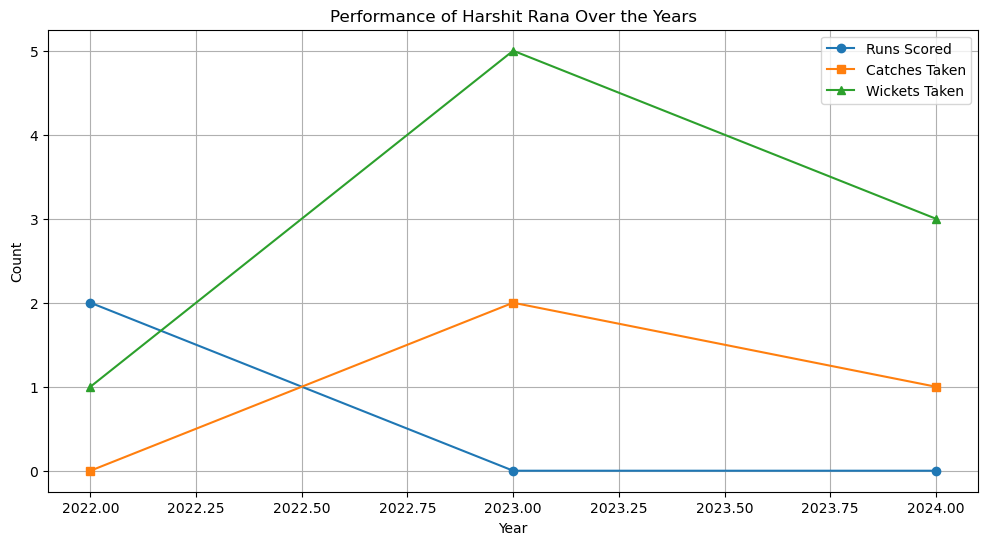

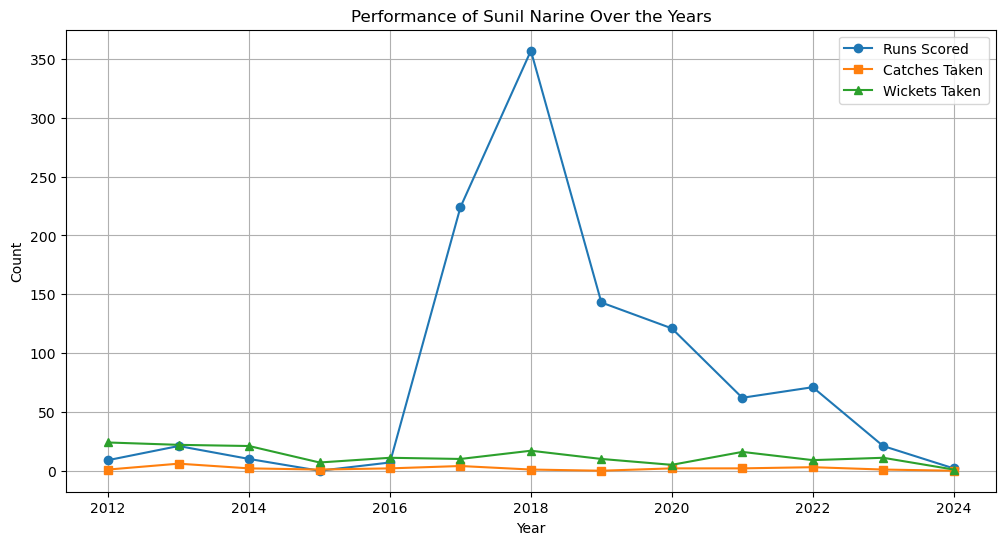

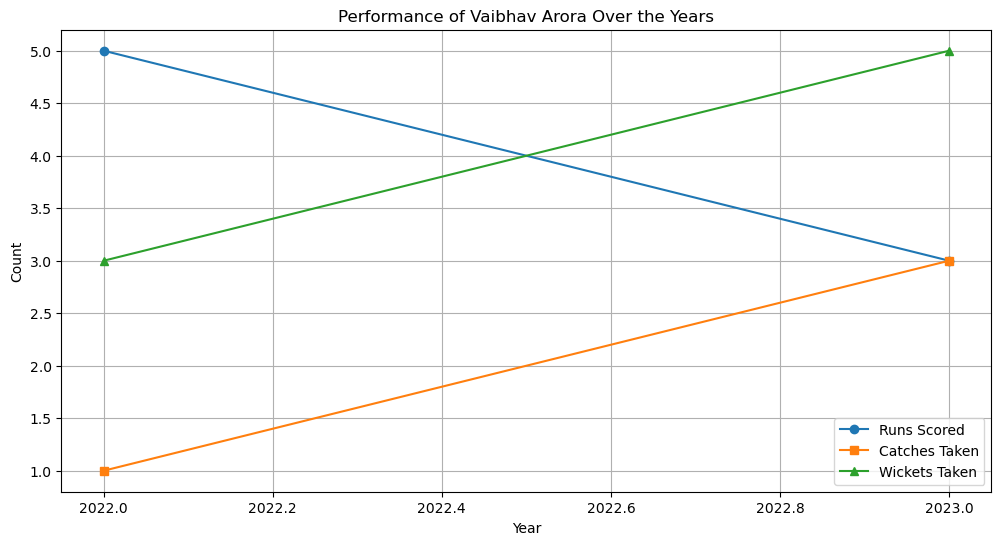

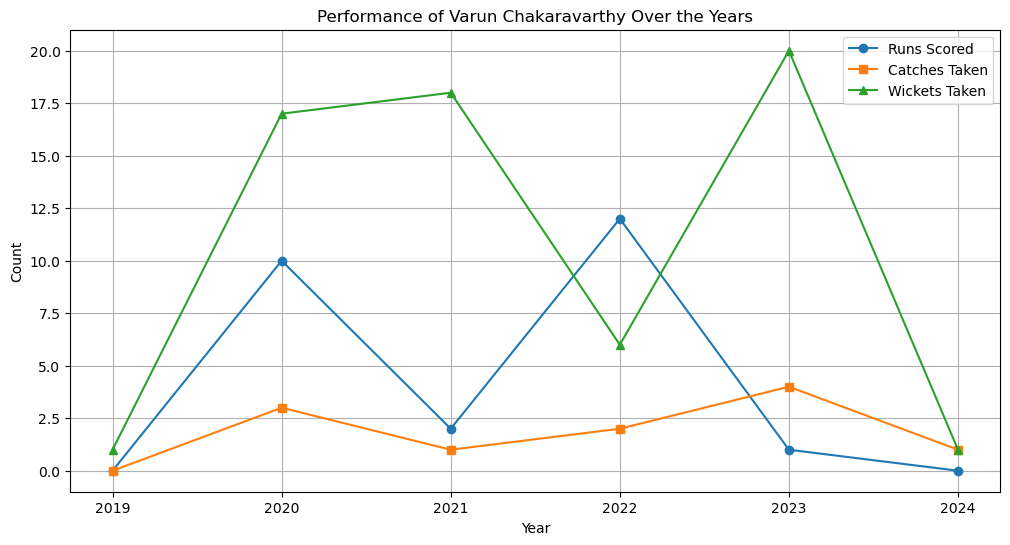

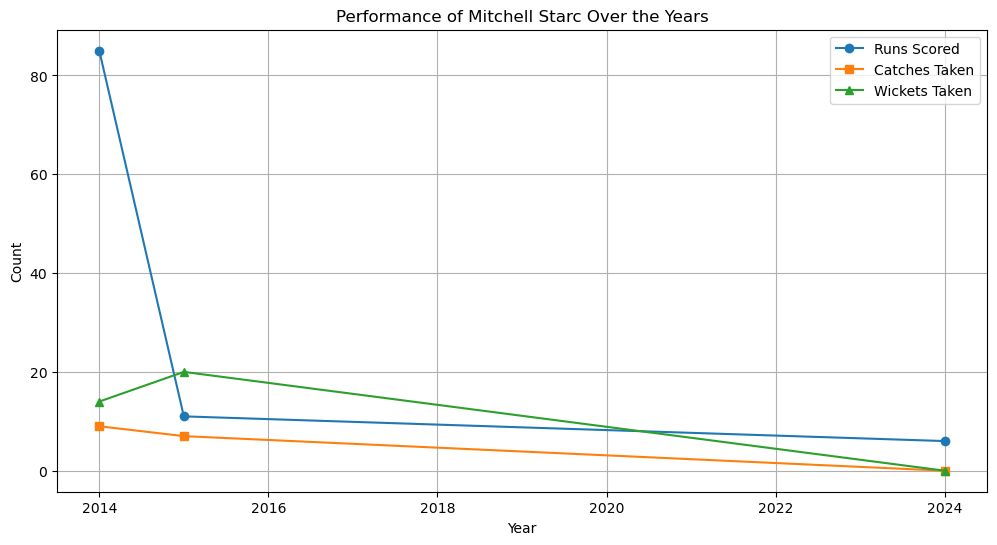

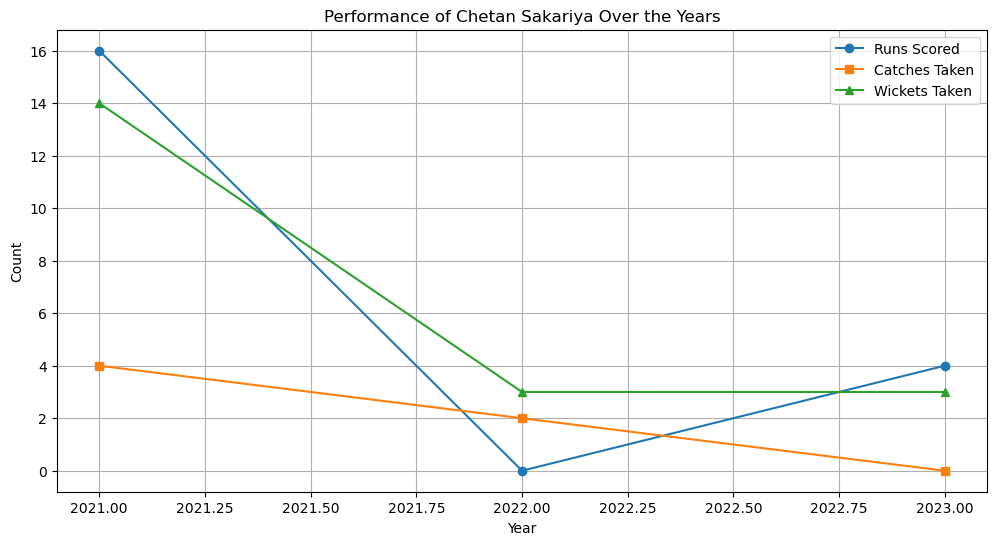

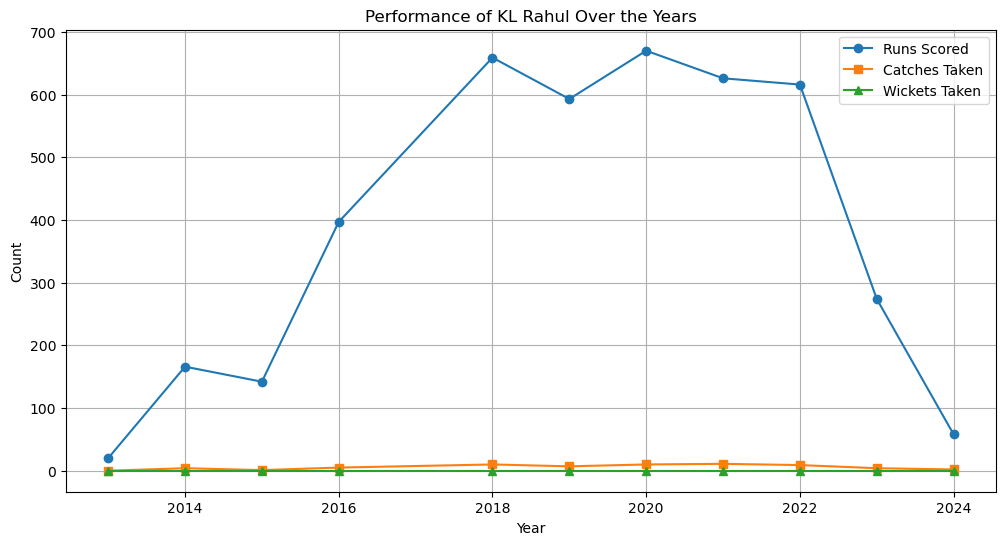

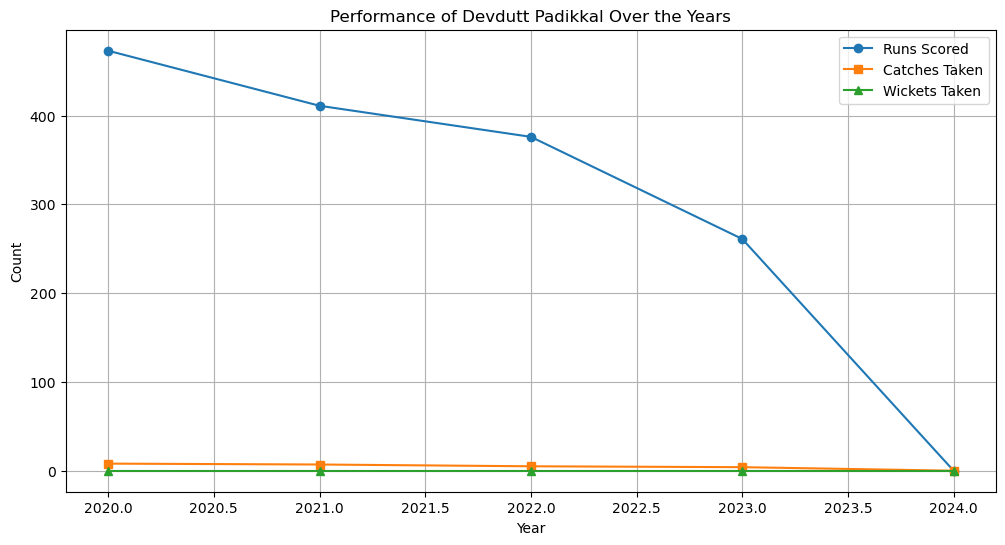

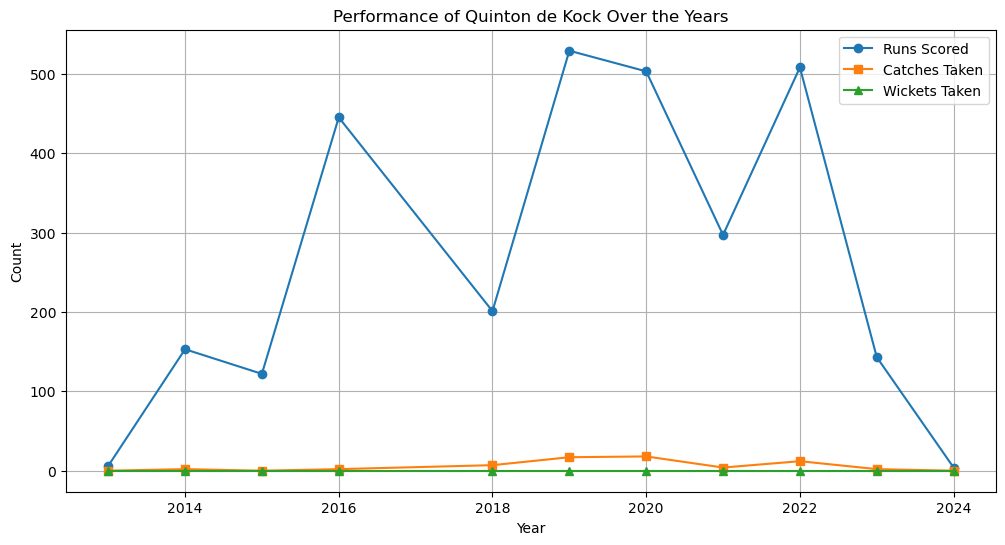

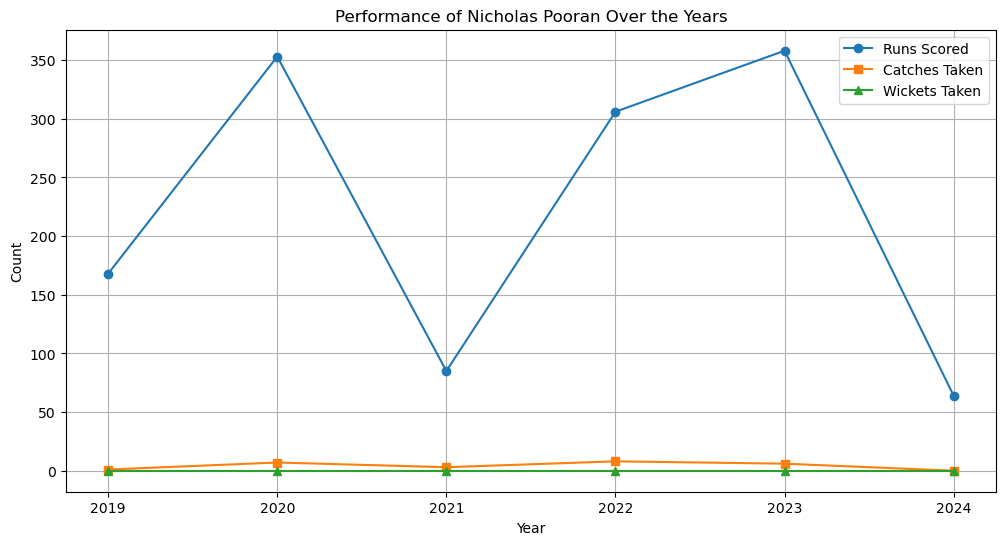

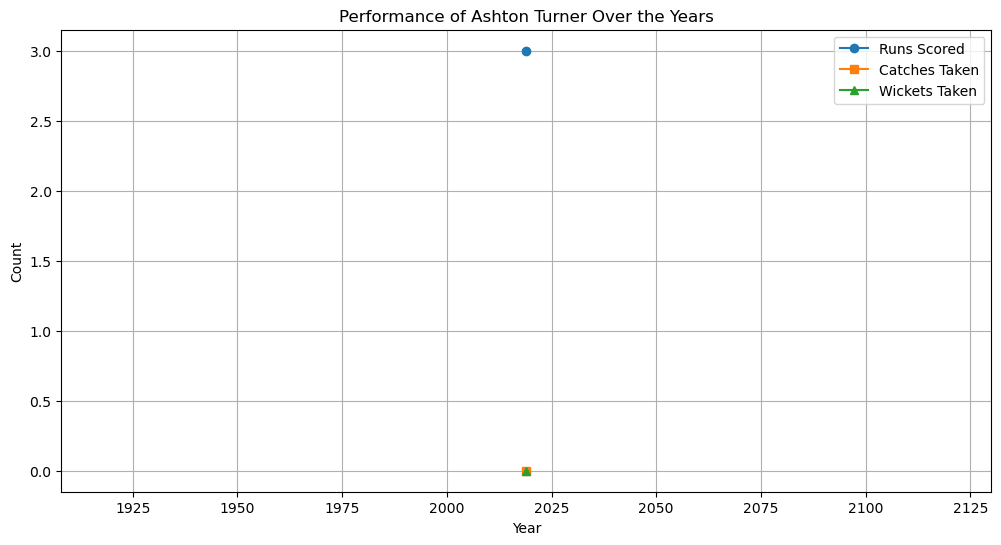

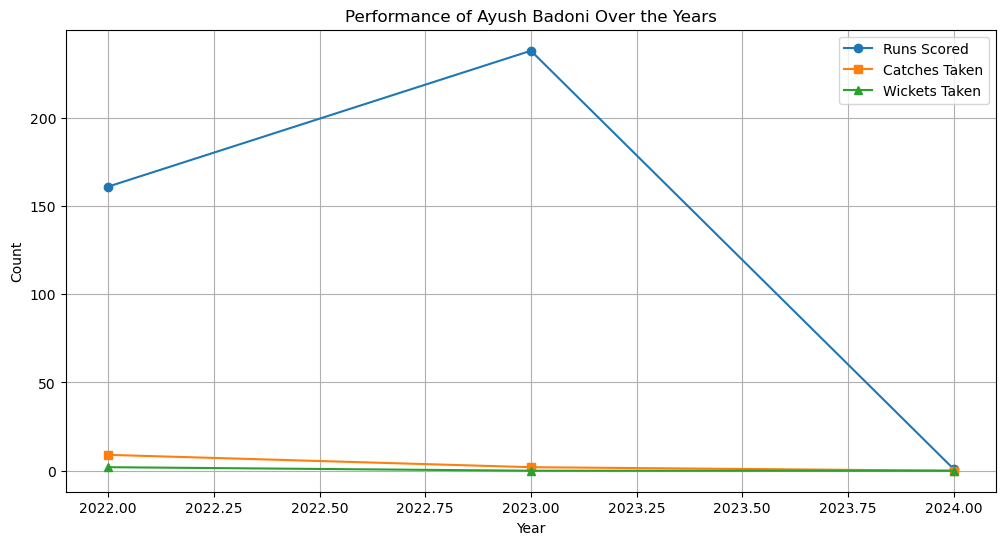

In [25]:
# Get unique player names
unique_players = dt['Player_Name'].unique()

for player_name in unique_players[:90]: 
   
    player_data = dt[dt['Player_Name'] == player_name].copy()

    player_data['Runs_Scored'] = pd.to_numeric(player_data['Runs_Scored'], errors='coerce')
    player_data['Catches_Taken'] = pd.to_numeric(player_data['Catches_Taken'], errors='coerce')
    player_data['Wickets_Taken'] = pd.to_numeric(player_data['Wickets_Taken'], errors='coerce')

    plt.figure(figsize=(12, 6))
    plt.plot(player_data['Year'], player_data['Runs_Scored'], marker='o', label='Runs Scored')
    plt.plot(player_data['Year'], player_data['Catches_Taken'], marker='s', label='Catches Taken')
    plt.plot(player_data['Year'], player_data['Wickets_Taken'], marker='^', label='Wickets Taken')

    plt.title(f'Performance of {player_name} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.savefig('image.jpg')
    plt.show()
    